# Data gathering

In [1]:
#Importing the BeautifulSoup library for web scraping, as well as numpy and pandas for data manipulation and analysis.
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
#Opening and reading the 'smartprix.html' file using UTF-8 encoding.
with open('smartprix.html','r',encoding='utf-8') as f:
    html=f.read()

In [4]:
#Creating a BeautifulSoup object 'soup' to parse the HTML content using the 'lxml' parser.
soup=BeautifulSoup(html,'lxml')

In [5]:
#Finding and storing all the HTML div elements with the specified class 'sm-product has-tag has-features has-actions' in the 'containers' variable.
containers=soup.find_all('div',{'class':'sm-product has-tag has-features has-actions'})

In [6]:
#This code scrapes and organizes smartphone details from HTML containers into separate lists 
names=[]
prices=[]
ratings=[]
sim=[]
processor=[]
ram=[]
battery=[]
display=[]
camera=[]
card=[]
os=[]

for i in containers:
    try:
        names.append(i.find('h2').text)
    except:
        names.append(np.nan)
    try:    
        prices.append(i.find('span',{'class':'price'}).text)
    except:
        prices.append(np.nan)
    try:
        ratings.append(i.find('div',{'class':'score rank-2-bg'}).find('b').text)
    except:
        ratings.append(np.nan)
    x=i.find('ul',{'class':'sm-feat specs'}).find_all('li')  
    try:
        sim.append(x[0].text)
    except:
        sim.append(np.nan)   
    try:
        processor.append(x[1].text)
    except:
        processor.append(np.nan)  
    try:
        ram.append(x[2].text)
    except:
        ram.append(np.nan)  
    try:
        battery.append(x[3].text)
    except:
        battery.append(np.nan)  
    try:
        display.append(x[4].text)
    except:
        display.append(np.nan)  
    try:
        camera.append(x[5].text)
    except:
        camera.append(np.nan)  
    try:
        card.append(x[6].text)
    except:
        card.append(np.nan)  
    try:
        os.append(x[7].text)
    except:
        os.append(np.nan)           
        
        

In [7]:
#Creating a pandas DataFrame named 'df' to organize scraped smartphone data into columns
df = pd.DataFrame({
    'model':names,
    'price':prices,
    'rating':ratings,
    'sim':sim,
    'processor':processor,
    'ram':ram,
    'battery':battery,
    'display':display,
    'camera':camera,
    'card':card,
    'os':os
})

In [8]:
df.isnull().sum()

model          0
price          0
rating       132
sim            0
processor      0
ram            0
battery        0
display        0
camera         0
card           4
os             6
dtype: int64

In [9]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,Xiaomi Redmi 12 5G,"₹11,999",75,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Snapdragon 4 Gen2, Octa Core, 2.2 GHz Processor","4 GB RAM, 128 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.79 inches, 1080 x 2460 px, 90 Hz Display wit...",50 MP + 2 MP Dual Rear & 8 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v13
1,Xiaomi Redmi 12 5G (6 GB RAM + 128 GB),"₹13,499",77,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Snapdragon 4 Gen2, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.79 inches, 1080 x 2460 px, 90 Hz Display wit...",50 MP + 2 MP Dual Rear & 8 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v13
2,Xiaomi Redmi 12 5G (8GB RAM + 256GB),"₹15,499",80,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Snapdragon 4 Gen2, Octa Core, 2.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.79 inches, 1080 x 2460 px, 90 Hz Display wit...",50 MP + 2 MP Dual Rear & 8 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v13
3,OnePlus Nord CE 3 Lite 5G,"₹19,999",85,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695 5G, Octa Core, 2.2 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.72 inches, 1080 x 2400 px, 120 Hz Display wi...",108 MP + 2 MP + 2 MP Triple Rear & 16 MP Front...,"Memory Card (Hybrid), upto 1 TB",Android v13
4,Samsung Galaxy F34 5G,"₹18,999",83,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Exynos 1280, Octa Core, 2.4 GHz Processor","6 GB RAM, 128 GB inbuilt",6000 mAh Battery with 25W Fast Charging,"6.5 inches, 1080 x 2340 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v13


In [10]:
df1=df.copy()

In [11]:
#Saving the DataFrame 'df' containing smartphone data to a CSV file named 'smartphone_updated.csv'
df.to_csv('smartphone_updated.csv')

In [12]:
df=pd.read_csv('smartphone_updated.csv')

In [13]:
df.to_excel('smartphone_updated.xlsx')

# Data Assessing
**After reviewing the scraped data, I found certain problems.**
### Quality Issues

1. **model** - some brands are written diiferently like OPPO & Oppo in model column 
2. **price** - has unneccesary '₹'
3. **price** - has ',' between numbers 
5. **ratings** - missing values 
6. **processor** -some processor has incorrect values in rows (515,528,592,687,913)
7.  **memory(ram)** - incorrect values in rows (51,174,290,450,517,519,520,532,541,596,626,691,719,723,724,792,851,881,886,908,917,949,955,984,994,1004)
8. **battery** - incorrect values in rows(183,343,450,519,520,531,541,596,626,691,723,724,886,908,917,949,984,1004) 
9. **display** - sometimes frequency is not available 
10. **display** - incorrect values in rows(172,179,339,515,528,537,592,687,719,720,882,913)
11. certain phones are foldable and the info is scattered 
12. **camera** - words like Dual, Triple and Quad are used to represent number of cameras and front and rear cameras are separated by '&'
13. **camera** - problem with rows (64,179,181,209,219,261,277,302,339,401,408,418,445,456,458,466,479,482,483,497,528,537,557,563,569,574,584,591,592,624,643,649,
687,715,719,720,741,755,758,775,788,797,798,800,801,803,805,882,889,895,907,908,909,913,957,963,987,1002,1013,1017,1018
) 
14. **card** - sometimes contains info about os and camera 
15. **os** - sometimes contains info about bluetooth and fm radio etc.
16. missing values in rating, card and os 




### Tidiness Issues

1. **sim** - can be split into 3 cols has_5g, has_NFC, has_IR_Blaster
2. **ram** - can be split into 2 cols  ram_capacity_gb and internal_memory
3. **processor** - can be split into processor_name, num_cores,processor_speed and processor_brand.
4. **battery** - can be split into battery_capacity_mAh, fast_charging and has_fastcharge
5. **display** - can be split into screen_size, resolution and refresh_rate
6. **camera** - can be split into    num_front_cameras,num_rear_cameras,primary_camera_rear_mp and primary_camera_front_mp 
7. **card** - can be split into memory_card_availeble and extended_memory_gb
8. **model** - can be split into model and brand_name

In [14]:
#Removing the currency symbol '₹' and commas from the 'price' column in the DataFrame 'df', and converting the values to integers.
df['price']=df['price'].str.replace('₹',"").str.replace(',',"").astype('int')

In [15]:
#Filtering the DataFrame 'df' to include only rows where the 'price' is greater than 3400 as price below 3400 phones are feature phones

df=df[df['price']>3400]

In [16]:
#Creating sets 'processor_rows', 'ram_rows', 'battery_rows', 'camera_rows', and 'display_rows' containing row indices which have some problems (like shifting issues) in the DataFrame 'df'.
processor_rows = set((515,528,592,687,913))
ram_rows=set((170,515,528,537,592,687,715,719,720,788,847,877,882,913,951,990))
battery_rows=set((179,339,515,528,537,592,687,719,720,882,913))
camera_rows=set((64,179,181,209,219,261,277,302,339,401,408,418,445,456,458,466,479,482,483,497,528,537,557,563,569,574,584,591,592,624,643,649, 687,715,719,720,741,755,758,775,788,797,798,800,801,803,805,882,889,895,907,908,909,913,957,963,987,1002,1013,1017,1018))
display_rows=set((179,339,515,528,537,592,687,719,720,882,913))

**Processing processor_rows**

In [17]:
df[df.index.isin(processor_rows)]

,Unnamed: 0,model,price,rating,sim,processor,ram,battery,display,camera,card,os
515,515,Xiaomi Pad 6 Max Tablet,32999,69.0,Wi-Fi,No 3G,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","6 GB RAM, 128 GB inbuilt",10000 mAh Battery with 67W Fast Charging,"12.4 inches, 1600 x 2560 px, 144 Hz Display",20 MP Rear & 8 MP Front Camera,Android v13
528,528,Nokia 2660 Flip,4449,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,0.3 MP Rear Camera
592,592,Nokia 8210 4G,3699,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
687,687,Nokia 8210 4G,3699,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
913,913,Nokia 5710 XpressAudio,4749,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"


**Nokia phones are feature phones, while Xiaomi Pad is a tablet, causing their removal as smartphones.**

In [18]:
df.drop([515,528,592,687,913],inplace=True)


In [19]:
#All the problematic rows which are accessible by menual investigation
df[df.index.isin(ram_rows | battery_rows | camera_rows | display_rows)]

,Unnamed: 0,model,price,rating,sim,processor,ram,battery,display,camera,card,os
64,64,Samsung Galaxy Z Fold 5,154999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen 2, Octa Core, 3.36 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v13
170,170,Huawei P60 Pro,83999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster","Snapdragon 8+ Gen 1 , Octa Core, 3.19 GHz Proc...",256 GB inbuilt,4815 mAh Battery with 88W Fast Charging,"6.67 inches, 1220 x 2700 px, 120 Hz Display wi...",48 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,Memory Card (Hybrid),HarmonyOS v3.1
179,179,Apple iPhone 12,53999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
181,181,OnePlus Open,124999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4800 mAh Battery with 67W Fast Charging,"7.8 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 48 MP + 48 MP Triple Rear & 32 MP + 20...,Memory Card Not Supported
209,209,Samsung Galaxy Z Flip 5,99999,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen 2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
...,...,...,...,...,...,...,...,...,...,...,...,...
990,990,Huawei P60,53990,80.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster","Snapdragon 8+ Gen 1, Octa Core, 3 GHz Processor",128 GB inbuilt,4815 mAh Battery with 66W Fast Charging,"6.67 inches, 1220 x 2700 px, 120 Hz Display wi...",48 MP + 13 MP + 12 MP Triple Rear & 13 MP Fron...,Memory Card (Hybrid),HarmonyOS v3.1
1002,1002,Samsung W23 Flip,94999,87.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
1013,1013,Asus ROG Phone 6D Ultimate,107990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor","16 GB RAM, 512 GB inbuilt",6000 mAh Battery with 65W Fast Charging,"6.78 inches, 1080 x 2448 px, 165 Hz Display",Dual Display,50 MP + 13 MP + 5 MP Triple Rear & 12 MP Front...,Memory Card Not Supported
1017,1017,Samsung Galaxy Z Flip 4 (8GB RAM + 512GB),98999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 512 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported


In [20]:
#All common problematic rows
temp_df=df[df.index.isin(ram_rows & battery_rows & camera_rows & display_rows)]
temp_df

,Unnamed: 0,model,price,rating,sim,processor,ram,battery,display,camera,card,os
537,537,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
719,719,Apple iPhone SE 3 2022 (128GB),48900,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",128 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
720,720,Apple iPhone SE 3 2022 (256GB),46599,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",256 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
882,882,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16,No FM Radio


**We can observe the data shifting issue in the battery,display,camera, and card columns.**

In [21]:
#Shifting the columns in the DataFrame 'temp_df' from 'battery' to 'os' one position to the right.
temp_df.loc[:, 'battery':'os'] = temp_df.loc[:, 'battery':'os'].shift(1, axis=1)


In [22]:
temp_df

,Unnamed: 0,model,price,rating,sim,processor,ram,battery,display,camera,card,os
537,537,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
719,719,Apple iPhone SE 3 2022 (128GB),48900,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",128 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
720,720,Apple iPhone SE 3 2022 (256GB),46599,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",256 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
882,882,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16


In [23]:
#update df
df[df.index.isin(ram_rows & battery_rows & camera_rows & display_rows)]=temp_df

In [24]:
df[df.index.isin(ram_rows & battery_rows & camera_rows & display_rows)]

,Unnamed: 0,model,price,rating,sim,processor,ram,battery,display,camera,card,os
537,537,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
719,719,Apple iPhone SE 3 2022 (128GB),48900,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",128 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
720,720,Apple iPhone SE 3 2022 (256GB),46599,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",256 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
882,882,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16


**Managing ram_rows**

In [25]:
temp_df=df[df.index.isin(battery_rows)]

In [26]:
temp_df

,Unnamed: 0,model,price,rating,sim,processor,ram,battery,display,camera,card,os
179,179,Apple iPhone 12,53999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
339,339,Apple iPhone 12 (128GB),56990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
537,537,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
719,719,Apple iPhone SE 3 2022 (128GB),48900,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",128 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
720,720,Apple iPhone SE 3 2022 (256GB),46599,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",256 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
882,882,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16


**Issue with shifting in row 179,339.**

In [27]:
#Shifted battery,display,camera,card,os right for rows 179, 339 in temp_df DataFrame.
temp_df.loc[[179,339], 'battery':'os'] = temp_df.loc[[179,339], 'battery':'os'].shift(1, axis=1)

In [28]:
temp_df

,Unnamed: 0,model,price,rating,sim,processor,ram,battery,display,camera,card,os
179,179,Apple iPhone 12,53999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
339,339,Apple iPhone 12 (128GB),56990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
537,537,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
719,719,Apple iPhone SE 3 2022 (128GB),48900,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",128 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
720,720,Apple iPhone SE 3 2022 (256GB),46599,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",256 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
882,882,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16


In [29]:
#Replacing rows in DataFrame 'df' with corresponding rows from 'temp_df'.
df[df.index.isin(battery_rows)]=temp_df

In [30]:
df[df.index.isin(battery_rows)]

,Unnamed: 0,model,price,rating,sim,processor,ram,battery,display,camera,card,os
179,179,Apple iPhone 12,53999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
339,339,Apple iPhone 12 (128GB),56990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
537,537,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
719,719,Apple iPhone SE 3 2022 (128GB),48900,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",128 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
720,720,Apple iPhone SE 3 2022 (256GB),46599,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",256 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
882,882,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16


**Managing display row**

In [31]:
temp_df=df[df.index.isin(display_rows)]
temp_df

,Unnamed: 0,model,price,rating,sim,processor,ram,battery,display,camera,card,os
179,179,Apple iPhone 12,53999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
339,339,Apple iPhone 12 (128GB),56990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
537,537,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
719,719,Apple iPhone SE 3 2022 (128GB),48900,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",128 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
720,720,Apple iPhone SE 3 2022 (256GB),46599,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",256 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
882,882,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16


**Display row is already in desired form**

**Managing battery rows**

In [32]:
df[df.index.isin(battery_rows)]

,Unnamed: 0,model,price,rating,sim,processor,ram,battery,display,camera,card,os
179,179,Apple iPhone 12,53999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
339,339,Apple iPhone 12 (128GB),56990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
537,537,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
719,719,Apple iPhone SE 3 2022 (128GB),48900,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",128 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
720,720,Apple iPhone SE 3 2022 (256GB),46599,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",256 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
882,882,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16


**Managing Camera row**

In [33]:
temp_df=df[df.index.isin(camera_rows)]

In [34]:
temp_df

,Unnamed: 0,model,price,rating,sim,processor,ram,battery,display,camera,card,os
64,64,Samsung Galaxy Z Fold 5,154999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen 2, Octa Core, 3.36 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v13
179,179,Apple iPhone 12,53999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
181,181,OnePlus Open,124999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4800 mAh Battery with 67W Fast Charging,"7.8 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 48 MP + 48 MP Triple Rear & 32 MP + 20...,Memory Card Not Supported
209,209,Samsung Galaxy Z Flip 5,99999,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen 2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
219,219,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
261,261,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display","Foldable Display, Dual Display",50 MP Quad Rear & 16 MP Front Camera,Android v12
277,277,Samsung Galaxy Z Flip 3,44999,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
302,302,Nokia 2720 V Flip,6199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,2 MP Rear Camera,Memory Card Supported
339,339,Apple iPhone 12 (128GB),56990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
401,401,Realme GT 5G,25999,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888 , Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 65W Fast Charging,"6.43 inches, 1080 x 2400 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v11,No FM Radio


***Some values of camera columns (where camera columns have values like foldable display and dual display) are in the card column.***

In [35]:
#make the temp_df camera columns have wronge values
temp_df=temp_df[~temp_df['camera'].str.contains('MP')]

In [36]:

temp_df.head()

,Unnamed: 0,model,price,rating,sim,processor,ram,battery,display,camera,card,os
64,64,Samsung Galaxy Z Fold 5,154999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen 2, Octa Core, 3.36 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v13
181,181,OnePlus Open,124999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4800 mAh Battery with 67W Fast Charging,"7.8 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 48 MP + 48 MP Triple Rear & 32 MP + 20...,Memory Card Not Supported
209,209,Samsung Galaxy Z Flip 5,99999,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen 2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
219,219,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
261,261,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display","Foldable Display, Dual Display",50 MP Quad Rear & 16 MP Front Camera,Android v12


In [37]:
#Shifting columns 'camera' to 'card' one position to the left in 'temp_df'.
temp_df.loc[:,'camera':'card']=temp_df.loc[:,'camera':'card'].shift(-1,axis=1)

In [38]:
temp_df.head()

,Unnamed: 0,model,price,rating,sim,processor,ram,battery,display,camera,card,os
64,64,Samsung Galaxy Z Fold 5,154999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen 2, Octa Core, 3.36 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,None,Android v13
181,181,OnePlus Open,124999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4800 mAh Battery with 67W Fast Charging,"7.8 inches, 1792 x 1920 px, 120 Hz Display wit...",64 MP + 48 MP + 48 MP Triple Rear & 32 MP + 20...,None,Memory Card Not Supported
209,209,Samsung Galaxy Z Flip 5,99999,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen 2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,None,Memory Card Not Supported
219,219,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",5 MP Rear Camera,None,"Memory Card Supported, upto 32 GB"
261,261,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",50 MP Quad Rear & 16 MP Front Camera,None,Android v12


In [39]:
#update df
df.loc[temp_df.index.values,:]=temp_df

In [40]:
df[df.index.isin(camera_rows)].head()

,Unnamed: 0,model,price,rating,sim,processor,ram,battery,display,camera,card,os
64,64,Samsung Galaxy Z Fold 5,154999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen 2, Octa Core, 3.36 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,None,Android v13
179,179,Apple iPhone 12,53999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
181,181,OnePlus Open,124999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4800 mAh Battery with 67W Fast Charging,"7.8 inches, 1792 x 1920 px, 120 Hz Display wit...",64 MP + 48 MP + 48 MP Triple Rear & 32 MP + 20...,None,Memory Card Not Supported
209,209,Samsung Galaxy Z Flip 5,99999,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen 2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,None,Memory Card Not Supported
219,219,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",5 MP Rear Camera,None,"Memory Card Supported, upto 32 GB"


**Managing card and Os columns.**

In [41]:
df['card'].value_counts()

Memory Card Supported, upto 1 TB                         201
Android v13                                              121
Memory Card Not Supported                                121
Memory Card (Hybrid), upto 1 TB                          113
Memory Card Supported                                     82
Android v12                                               76
Memory Card Supported, upto 512 GB                        66
Memory Card (Hybrid)                                      36
Memory Card Supported, upto 256 GB                        28
Android v14                                               25
Android v11                                               16
Memory Card Supported, upto 2 TB                          16
Memory Card (Hybrid), upto 512 GB                          8
Memory Card Supported, upto 128 GB                         6
Memory Card (Hybrid), upto 256 GB                          5
Android v10                                                4
Memory Card (Hybrid), up

In [42]:
df['card'].isnull().sum()

49

In [43]:
#Creating 'temp_df' by excluding rows in 'df' where 'card' contains 'Memory' and have not null values
temp_df=df[~(df['card'].str.contains('Memory') & df['card'].notna())]
temp_df.sample(5)

,Unnamed: 0,model,price,rating,sim,processor,ram,battery,display,camera,card,os
936,936,Motorola Edge Plus 2023,54990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 512 GB inbuilt",5100 mAh Battery with 68W Fast Charging,"6.67 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 50 MP + 12 MP Triple Rear & 60 MP Fron...,Android v13,No FM Radio
558,558,Xiaomi Civi 3,28990,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8200 Ultra, Octa Core, 3.1 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP + 32 M...,Android v13,No FM Radio
497,497,Xiaomi Mix Fold 3,109990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC,...","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4800 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display",50 MP Quad Rear & 32 MP Front Camera,None,Android v13
184,184,Nubia Red Magic 8 Pro 5G,46990,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",6000 mAh Battery with 80W Fast Charging,"6.8 inches, 1116 x 2480 px, 120 Hz Display",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v13,No FM Radio
251,251,Motorola Edge 30 Ultra,39899,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",4610 mAh Battery with 125W Fast Charging,"6.67 inches, 1080 x 2400 px, 144 Hz Display wi...",200 MP + 50 MP + 12 MP Triple Rear & 60 MP Fro...,Android v12,No FM Radio


In [44]:
df.loc[df['card'].isna()&df['os'].str.contains('Memory')]

,Unnamed: 0,model,price,rating,sim,processor,ram,battery,display,camera,card,os
181,181,OnePlus Open,124999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4800 mAh Battery with 67W Fast Charging,"7.8 inches, 1792 x 1920 px, 120 Hz Display wit...",64 MP + 48 MP + 48 MP Triple Rear & 32 MP + 20...,None,Memory Card Not Supported
209,209,Samsung Galaxy Z Flip 5,99999,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen 2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,None,Memory Card Not Supported
219,219,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",5 MP Rear Camera,None,"Memory Card Supported, upto 32 GB"
277,277,Samsung Galaxy Z Flip 3,44999,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,None,Memory Card Not Supported
302,302,Nokia 2720 V Flip,6199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,None,Memory Card Supported
408,408,Motorola Razr 40 Ultra,89999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",3800 mAh Battery with 30W Fast Charging,"6.9 inches, 1080 x 2640 px, 165 Hz Display wit...",13 MP + 12 MP Dual Rear & 32 MP Front Camera,None,Memory Card Not Supported
456,456,Vivo X Flip,71990,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 44W Fast Charging,"6.74 inches, 1080 x 2520 px, 120 Hz Display wi...",50 MP + 12 MP Dual Rear & 32 MP Front Camera,None,Memory Card Not Supported
482,482,Motorola Razr 40,59999,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 7 Gen1, Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",4200 mAh Battery with 30W Fast Charging,"6.9 inches, 1080 x 2640 px, 144 Hz Display wit...",64 MP + 13 MP Dual Rear & 32 MP Front Camera,None,Memory Card Not Supported
483,483,OPPO Find N4 Flip,99990,83.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen3, Octa Core Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.83 inches, 1800 x 3400 px, 120 Hz Display wi...",108 MP + 50 MP Dual Rear & 32 MP Front Camera,None,Memory Card Not Supported
557,557,OPPO Find N2 Flip,89999,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1080 x 2520 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 32 MP Front Camera,None,Memory Card Not Supported


**Again shifting issues**

In [45]:
df_temp_cardNa=temp_df[temp_df['card'].isnull()&temp_df['os'].str.contains('Memory')].loc[:,'card':'os'].shift(-1,axis=1)
df_temp_cardNa.head()

,card,os
181,Memory Card Not Supported,None
209,Memory Card Not Supported,None
219,"Memory Card Supported, upto 32 GB",None
277,Memory Card Not Supported,None
302,Memory Card Supported,None


In [46]:
#update df
df.loc[df_temp_cardNa.index,'card':'os']=df_temp_cardNa

In [47]:
temp_df1=temp_df[temp_df['card'].notnull() & ~temp_df['card'].str.contains('Memory', na=False)][['card','os']]
temp_df1

,card,os
8,Android v13,Bluetooth
10,Android v13,No FM Radio
15,Android v13,No FM Radio
21,Android v13,No FM Radio
22,Android v13,No FM Radio
...,...,...
986,Android v11,No FM Radio
988,Android v13,Bluetooth
994,Android v12,No FM Radio
1008,Android v12,No FM Radio


**Again we can see the shifting issue**

In [48]:
#Creating 'temp_df1' by shifting columns 'card' and 'os' one position to the right in 'temp_df' for rows where 'card' is not null and does not contain 'Memory'.
temp_df1=temp_df1.shift(1,axis=1)
temp_df1.head()

,card,os
8,None,Android v13
10,None,Android v13
15,None,Android v13
21,None,Android v13
22,None,Android v13


In [49]:
#Updating the 'card' and 'os' columns in the DataFrame 'df' with corresponding values from the 'temp_df1' DataFrame using the indices present in 'temp_df1'.
df.loc[temp_df1.index,['card','os']]=temp_df1

In [50]:
df['card'].value_counts()

Memory Card Supported, upto 1 TB       201
Memory Card Not Supported              142
Memory Card (Hybrid), upto 1 TB        113
Memory Card Supported                   83
Memory Card Supported, upto 512 GB      66
Memory Card (Hybrid)                    37
Memory Card Supported, upto 256 GB      28
Memory Card Supported, upto 2 TB        16
Memory Card (Hybrid), upto 512 GB        8
Memory Card Supported, upto 128 GB       7
Memory Card (Hybrid), upto 256 GB        7
Memory Card (Hybrid), upto 128 GB        3
Memory Card (Hybrid), upto 2 TB          3
Memory Card Supported, upto 32 GB        2
Memory Card Supported, upto 1000 GB      2
Memory Card Supported, upto 64 GB        1
Name: card, dtype: int64

In [51]:
df['os'].value_counts()

Android v13                                              340
Android v12                                              338
Android v11                                              100
Android v14                                               70
Android v10                                               23
iOS v16                                                   15
Android v10.0                                             12
Android v9.0 (Pie)                                        11
iOS v15                                                   10
Android v15                                                5
HarmonyOS v3.1                                             4
iOS v13                                                    3
Flyme 10                                                   3
iOS v18                                                    3
Android v8.1 (Oreo)                                        3
Hongmeng OS v4.0                                           3
Android v12.1           

In [52]:
df.loc[df['os'] == '50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front Camera', 'os'] = 'Android v12'

In [53]:
df['os'].value_counts()

Android v13                340
Android v12                339
Android v11                100
Android v14                 70
Android v10                 23
iOS v16                     15
Android v10.0               12
Android v9.0 (Pie)          11
iOS v15                     10
Android v15                  5
HarmonyOS v3.1               4
Android v8.1 (Oreo)          3
Flyme 10                     3
iOS v13                      3
iOS v18                      3
Hongmeng OS v4.0             3
iOS v14                      2
HarmonyOS                    2
Android                      2
EMUI v13                     2
Android v12.1                2
Android v5.1 (Lollipop)      1
Android v7.0 (Nougat)        1
iOS v10                      1
iOS v13.0                    1
iOS v15.0                    1
Bluetooth                    1
iOS v17                      1
Android v11.0                1
HarmonyOS v2                 1
HarmonyOS v3.0               1
Name: os, dtype: int64

In [54]:
df[df['os']=='Bluetooth']='KAI OS'

In [55]:
pd.set_option('display.max_columns', None)
df['os'].value_counts().reset_index()

,index,os
0,Android v13,340
1,Android v12,339
2,Android v11,100
3,Android v14,70
4,Android v10,23
5,iOS v16,15
6,Android v10.0,12
7,Android v9.0 (Pie),11
8,iOS v15,10
9,Android v15,5


# Feature decomposition 
1. **sim** - can be split into 3 cols has_5g, has_NFC, has_IR_Blaster
2. **ram** - can be split into 2 cols  ram_capacity_gb and internal_memory
3. **processor** - can be split into processor_name, num_cores,processor_speed and processor_brand.
4. **battery** - can be split into battery_capacity_mAh, fast_charging and has_fastcharge
5. **display** - can be split into screen_size, resolution and refresh_rate
6. **camera** - can be split into    num_front_cameras,num_rear_cameras,primary_camera_rear_mp and primary_camera_front_mp 
7. **card** - can be split into memory_card_availeble and extended_memory_gb
8. **model** - can be split into model and brand_name

**Creating the brand_name column**

In [56]:
df['model']=df['model'].str.lower()

In [57]:
brand_name=df['model'].str.strip().str.split(' ').str.get(0)

In [58]:
#Creating a new column 'brand_name' in the DataFrame 'df' by extracting the first word from the 'model' column, which represents the brand name.
df.insert(1,'brand_name',brand_name)

**Creating columns has_5g, has_NFC, and has_IR_Blaster**

In [59]:
has_5g=df['sim'].str.contains('5G')
has_nfc=df['sim'].str.contains('NFC')
has_ir_blaster=df['sim'].str.contains('IR Blaster')

In [60]:
#Creating 'has_5g', 'has_nfc', and 'has_ir_blaster' 
df.insert(6,'has_5g',has_5g)
df.insert(7,'has_nfc',has_nfc)
df.insert(8,'has_ir_blaster',has_ir_blaster)

**Creating columns processor_name, num_cores,processor_speed and processor_brand.**

In [61]:
processor_name=df['processor'].str.strip().str.split(',').str.get(0)
num_cores=df['processor'].str.strip().str.split(',').str.get(1)
processor_speed=df['processor'].str.strip().str.split(',').str.get(2)

In [62]:
df.insert(10,'processor_name',processor_name)
df.insert(11,'num_cores',num_cores)
df.insert(12,'processor_speed',processor_speed)

In [63]:
df['processor_name'].str.split(" ").str.get(0).value_counts()

Snapdragon    416
Dimensity     227
Helio         161
Exynos         52
Bionic         32
Unisoc         24
Octa           21
Tiger          19
Google          8
Spreadtrum      7
A13             4
Quad            4
Kirin           3
Tensor          2
unisoc          2
Qualcomm        2
Hexa            2
Sanpdragon      2
KAI             1
Samsung         1
Fusion          1
1.3 GHz         1
Name: processor_name, dtype: int64

***df['processor_name'] has some Octa core ,KAI OS,GHz etc.values***

In [64]:
df[df['processor_name'].str.contains('Core') | df['processor_name'].str.contains('GHz') | df['processor_name'].str.contains('KAI OS')].head()

,Unnamed: 0,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os
149,149,jio,jio phone 3,4499,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Quad Core, 1.4 GHz Processor",Quad Core,1.4 GHz Processor,NaN,"2 GB RAM, 64 GB inbuilt",2800 mAh Battery,"5 inches, 720 x 1280 px Display",5 MP Rear & 2 MP Front Camera,"Memory Card Supported, upto 128 GB",Android v8.1 (Oreo)
202,202,itel,itel s23,8999,75.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Octa Core, 1.6 GHz Processor",Octa Core,1.6 GHz Processor,NaN,"8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 10W Fast Charging,"6.6 inches, 1600 x 720 px, 90 Hz Display with ...",50 MP + 0.08 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 512 GB",Android v13
266,266,tesla,tesla pi phone,69999,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,Octa Core Processor,Octa Core Processor,NaN,NaN,"16 GB RAM, 512 GB inbuilt",5000 mAh Battery with 120W Fast Charging,"6.73 inches, 1080 x 2448 px, 165 Hz Display",50 MP + 50 MP + 50 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,Android v13
288,288,oppo,oppo reno 11 pro,47990,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,Octa Core Processor,Octa Core Processor,NaN,NaN,"16 GB RAM, 256 GB inbuilt",5000 mAh Battery with 150W Fast Charging,"6.73 inches, 1080 x 2412 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,None,Android v14
306,306,ikall,ikall z19 pro,7699,60.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Quad Core, 1.6 GHz Processor",Quad Core,1.6 GHz Processor,NaN,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery,"6.5 inches, 720 x 1600 px Display with Water D...",13 MP Rear & 8 MP Front Camera,"Memory Card (Hybrid), upto 128 GB",Android v11.0


***Again shifting issue from columns processor_name to processor_speed***

In [65]:
temp_df=df[(df['processor_name'].str.contains('GHz'))|(df['processor_name'].str.contains('Core'))|(df['processor_name'].str.contains('KAI OS'))].loc[:,'processor_name':'processor_speed']
temp_df.head()

,processor_name,num_cores,processor_speed
149,Quad Core,1.4 GHz Processor,NaN
202,Octa Core,1.6 GHz Processor,NaN
266,Octa Core Processor,NaN,NaN
288,Octa Core Processor,NaN,NaN
306,Quad Core,1.6 GHz Processor,NaN


In [66]:
temp_df=temp_df.shift(1,axis=1)
temp_df.head()

,processor_name,num_cores,processor_speed
149,None,Quad Core,1.4 GHz Processor
202,None,Octa Core,1.6 GHz Processor
266,None,Octa Core Processor,NaN
288,None,Octa Core Processor,NaN
306,None,Quad Core,1.6 GHz Processor


In [67]:
#update df
df.loc[temp_df.index,'processor_name':'processor_speed']=temp_df

In [68]:
df['processor_name'].str.split(" ").str.get(0).value_counts()

Snapdragon    416
Dimensity     227
Helio         161
Exynos         52
Bionic         32
Unisoc         24
Tiger          19
Google          8
Spreadtrum      7
A13             4
Kirin           3
Tensor          2
unisoc          2
Qualcomm        2
Sanpdragon      2
Samsung         1
Fusion          1
Name: processor_name, dtype: int64

***Sanpdragon & Snapdragon are same***

In [69]:
# Identify rows with 'Sanpdragon' and replace with 'Snapdragon'
df['processor_name'] = df['processor_name'].str.replace('Sanpdragon', 'Snapdragon')


In [70]:
df['processor_name'].str.split(" ").str.get(0).value_counts()

Snapdragon    418
Dimensity     227
Helio         161
Exynos         52
Bionic         32
Unisoc         24
Tiger          19
Google          8
Spreadtrum      7
A13             4
Kirin           3
Tensor          2
unisoc          2
Qualcomm        2
Samsung         1
Fusion          1
Name: processor_name, dtype: int64

In [71]:
df['num_cores'].value_counts()

 Octa Core              820
 Octa Core Processor     78
 Hexa Core               31
 Quad Core               28
Octa Core Processor      18
Quad Core                 4
Octa Core                 3
Hexa Core                 2
 Dual Core                1
KAI OS                    1
 Hexa Core Processor      1
 Quad Core Processor      1
1.3 GHz Processor         1
Name: num_cores, dtype: int64

In [72]:
#Stripping leading and trailing whitespace from values in the 'num_cores' column of the DataFrame 'df'.
df['num_cores']=df['num_cores'].str.strip()

In [73]:
df[df['num_cores']=='KAI OS']

,Unnamed: 0,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os
418,KAI OS,kai,kai os,KAI OS,KAI OS,KAI OS,False,False,False,KAI OS,None,KAI OS,NaN,KAI OS,KAI OS,KAI OS,KAI OS,KAI OS,KAI OS


In [74]:
df.drop(418,inplace=True)

In [75]:
temp_df=df[df['num_cores'].str.contains('1.3 GHz Processor')|df['num_cores'].str.contains('KAI OS')]
temp_df

,Unnamed: 0,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os
916,916,jmax,jmax a8 ultra,3490,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,1.3 GHz Processor,None,1.3 GHz Processor,NaN,"1 GB RAM, 16 GB inbuilt",2500 mAh Battery with Fast Charging,"5.5 inches, 720 x 1600 px Display",5 MP Rear & 2 MP Front Camera,"Memory Card Supported, upto 64 GB",Android v8.1 (Oreo)


In [76]:
temp_df.loc[:, 'processor':'processor_speed'] = temp_df.loc[:, 'processor':'processor_speed'].shift(1, axis=1)


In [77]:
#
temp_df.iloc[:,10:11]=None

In [78]:
#update df
df[df['num_cores'].str.contains('1.3 GHz Processor')|df['num_cores'].str.contains('KAI OS')]=temp_df

In [79]:
df['num_cores']=df['num_cores'].str.strip()

In [80]:
df['num_cores'].value_counts()

Octa Core              823
Octa Core Processor     96
Hexa Core               33
Quad Core               32
Dual Core                1
Hexa Core Processor      1
Quad Core Processor      1
Name: num_cores, dtype: int64

In [81]:
#convert df['num_cores'] in numerical values
df['num_cores'].replace({'Octa Core': 8,
                        'Octa Core Processor':8,
                        'Hexa Core':6,
                        'Hexa Core Processor':6,
                        'Quad Core Processor':4,
                        'Quad Core':4,
                        'Dual Core':2},inplace=True)

In [82]:
df['num_cores'].value_counts()

8.0    919
6.0     34
4.0     33
2.0      1
Name: num_cores, dtype: int64

In [83]:
df['processor_speed'].value_counts()

 2.2 GHz Processor     165
 3.2 GHz Processor     126
 2.4 GHz Processor     113
 2 GHz Processor       113
 2.3 GHz Processor      59
 3 GHz Processor        36
 2.6 GHz Processor      31
 1.6 GHz Processor      25
 3.05 GHz Processor     21
 2.84 GHz Processor     19
 3.1 GHz Processor      18
 2.85 GHz Processor     18
 2.5 GHz Processor      15
 1.8 GHz Processor      15
 3.22 GHz Processor     14
 3.36 GHz Processor     12
 3.46 GHz Processor     11
 2.8 GHz Processor      10
 2.05 GHz Processor      9
 2.91 GHz Processor      9
 2.9 GHz Processor       8
 2.7 GHz Processor       8
 1.3 GHz Processor       7
 2.73 GHz Processor      6
 1.82 GHz Processor      5
 2.65 GHz Processor      4
 1.4 GHz Processor       2
 2.86 GHz Processor      2
 2.96 GHz Processor      2
 3.19 GHz Processor      1
 2.36 GHz Processor      1
 1.1 GHz Processor       1
 3.35 GHz Processor      1
 3.13 GHz Processor      1
 2.37 GHz Processor      1
1.3 GHz Processor        1
Name: processor_speed, dtype

In [84]:
df['processor_speed'].str.split()

0       [2.2, GHz, Processor]
1       [2.2, GHz, Processor]
2       [2.2, GHz, Processor]
3       [2.2, GHz, Processor]
4       [2.4, GHz, Processor]
                ...          
1015    [1.4, GHz, Processor]
1016                      NaN
1017    [3.2, GHz, Processor]
1018    [3.2, GHz, Processor]
1019    [2.4, GHz, Processor]
Name: processor_speed, Length: 991, dtype: object

In [85]:
#convert df['processor_speed'] in numerical values
df['processor_speed']=df['processor_speed'].str.split().str.get(0)

In [86]:
processor_brand=df['processor_name'].str.split(' ').str.get(0)
df.insert(9,'processor_brand',processor_brand)

**ram - can be split into 2 columns ram_capacity_gb and internal_memory**

In [87]:
#create ram_capacity_gb column
df['ram_capacity_gb']=df['ram'].str.split(',').str.get(0).str.split(' ').str.get(0).str.replace('GB','')

In [88]:
#create internal_memory column
df['internal_memory']=df['ram'].str.split(',').str.get(1).str.strip().str.split().str.get(0)

In [89]:
df['ram_capacity_gb'].value_counts()

8         404
6         173
4         172
12        146
3          29
2          26
16         24
256         5
1           3
128         3
18          2
64          2
512 MB      1
512         1
Name: ram_capacity_gb, dtype: int64

In [90]:
#convert to gb value
df[df['ram_capacity_gb'].str.contains('512 MB')]['ram_capacity_gb'].str.replace('512 MB','0.5')

302    0.5
Name: ram_capacity_gb, dtype: object

In [91]:
df.loc[302,'ram_capacity_gb']=0.5

In [92]:
df['ram_capacity_gb']=df['ram_capacity_gb'].astype('float')

In [93]:
temp_df=df[df['ram_capacity_gb']>18]
temp_df

,Unnamed: 0,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor_brand,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os,ram_capacity_gb,internal_memory
170,170,huawei,huawei p60 pro,83999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster",False,True,True,Snapdragon,"Snapdragon 8+ Gen 1 , Octa Core, 3.19 GHz Proc...",Snapdragon 8+ Gen 1,8.0,3.19,256 GB inbuilt,4815 mAh Battery with 88W Fast Charging,"6.67 inches, 1220 x 2700 px, 120 Hz Display wi...",48 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,Memory Card (Hybrid),HarmonyOS v3.1,256.0,NaN
537,537,apple,apple iphone se 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,Bionic,"Bionic A15, Hexa Core, 3.22 GHz Processor",Bionic A15,6.0,3.22,64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,64.0,NaN
715,715,huawei,huawei mate x3,155999,79.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster",False,True,True,Snapdragon,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,8.0,3.2,256 GB inbuilt,4800 mAh Battery with 66W Fast Charging,"7.85 inches, 2224 x 2496 px, 120 Hz Display wi...",50 MP + 13 MP + 8 MP Triple Rear & 8 MP Front ...,"Memory Card (Hybrid), upto 256 GB",None,256.0,NaN
719,719,apple,apple iphone se 3 2022 (128gb),48900,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,Bionic,"Bionic A15, Hexa Core, 3.22 GHz Processor",Bionic A15,6.0,3.22,128 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,128.0,NaN
720,720,apple,apple iphone se 3 2022 (256gb),46599,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,Bionic,"Bionic A15, Hexa Core, 3.22 GHz Processor",Bionic A15,6.0,3.22,256 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,256.0,NaN
788,788,huawei,huawei mate x3 pro,169999,80.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster",False,True,True,Snapdragon,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,8.0,3.2,256 GB inbuilt,5000 mAh Battery with 66W Fast Charging,"7.85 inches, 2224 x 2496 px, 120 Hz Display wi...",100 MP + 13 MP + 8 MP Triple Rear & 8 MP Front...,"Memory Card (Hybrid), upto 256 GB",None,256.0,NaN
847,847,huawei,huawei p60 art,107990,83.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster",False,True,True,Snapdragon,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,8.0,3.2,512 GB inbuilt,5100 mAh Battery with 80W Fast Charging,"6.67 inches, 1220 x 2700 px, 120 Hz Display wi...",48 MP + 48 MP + 40 MP Triple Rear & 13 MP Fron...,Memory Card (Hybrid),HarmonyOS v3.1,512.0,NaN
877,877,huawei,huawei p60,53990,80.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster",False,True,True,Snapdragon,"Snapdragon 8+ Gen 1, Octa Core, 3 GHz Processor",Snapdragon 8+ Gen 1,8.0,3,128 GB inbuilt,4815 mAh Battery with 66W Fast Charging,"6.67 inches, 1220 x 2700 px, 120 Hz Display wi...",48 MP + 13 MP + 12 MP Triple Rear & 13 MP Fron...,Memory Card (Hybrid),HarmonyOS v3.1,128.0,NaN
882,882,apple,apple iphone se 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,Bionic,"Bionic A15, Hexa Core, 3.22 GHz Processor",Bionic A15,6.0,3.22,64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16,64.0,NaN
951,951,huawei,huawei nova 11,29990,74.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",False,True,False,Snapdragon,"Snapdragon 778G, Octa Core, 2.4 GHz Processor",Snapdragon 778G,8.0,2.4,256 GB inbuilt,4500 mAh Battery with 66W Fast Charging,"6.7 inches, 1084 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 60 MP Front Camera,None,HarmonyOS v3.0,256.0,NaN


***All the phones that have ram_capacity_gb > 18 should have internal_memory values in the ram_capacity_gb column***

In [94]:
temp_df.loc[:,'ram_capacity_gb':'internal_memory'].shift(1,axis=1)

,ram_capacity_gb,internal_memory
170,NaN,256.0
537,NaN,64.0
715,NaN,256.0
719,NaN,128.0
720,NaN,256.0
788,NaN,256.0
847,NaN,512.0
877,NaN,128.0
882,NaN,64.0
951,NaN,256.0


In [95]:
temp_df.loc[:,'ram_capacity_gb':'internal_memory']=temp_df.loc[:,'ram_capacity_gb':'internal_memory'].shift(1,axis=1)

In [96]:
#update df
df.loc[temp_df.index,:]=temp_df

In [97]:
df['internal_memory'].value_counts()

128      476
256      274
64       151
32        35
512       32
16         7
256.0      5
1          4
128.0      3
64.0       2
4          1
512.0      1
Name: internal_memory, dtype: int64

In [98]:
df['internal_memory']=df['internal_memory'].astype('float')

In [99]:
df[df['internal_memory']<=18]

,Unnamed: 0,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor_brand,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os,ram_capacity_gb,internal_memory
119,119,realme,realme narzo 60 pro (12gb ram + 1tb),29999,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,Dimensity,"Dimensity 7050, Octa Core, 2.6 GHz Processor",Dimensity 7050,8.0,2.6,"12 GB RAM, 1 TB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2400 px, 120 Hz Display wit...",100 MP + 2 MP Dual Rear & 16 MP Front Camera,None,Android v13,12.0,1.0
302,302,nokia,nokia 2720 v flip,6199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,Snapdragon,"Snapdragon 205 , Dual Core, 1.1 GHz Processor",Snapdragon 205,2.0,1.1,"512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,None,0.5,4.0
332,332,apple,apple iphone 14 pro max (1tb),177999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,Bionic,"Bionic A16, Hexa Core, 3.46 GHz Processor",Bionic A16,6.0,3.46,"6 GB RAM, 1 TB inbuilt",4323 mAh Battery with Fast Charging,"6.7 inches, 1290 x 2796 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v16,6.0,1.0
449,449,ikall,ikall k333 4g,3689,NaN,"Dual Sim, 3G, 4G, VoLTE",False,False,False,Helio,Helio MT6739,Helio MT6739,NaN,NaN,"2 GB RAM, 16 GB inbuilt",3000 mAh Battery,"2.8 inches, 240 x 360 px Display",2 MP Rear & 2 MP Front Camera,"Memory Card Supported, upto 128 GB",Android v12,2.0,16.0
479,479,samsung,samsung galaxy z fold 5 (12gb ram + 1tb),184999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC",True,True,False,Snapdragon,"Snapdragon 8 Gen 2, Octa Core, 3.36 GHz Processor",Snapdragon 8 Gen 2,8.0,3.36,"12 GB RAM, 1 TB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,None,Android v13,12.0,1.0
480,480,ikall,ikall k333 plus,3799,NaN,"Dual Sim, 3G, 4G, VoLTE",False,False,False,None,"Quad Core, 1.3 GHz Processor",None,4.0,1.3,"2 GB RAM, 16 GB inbuilt",3000 mAh Battery,"2.8 inches, 240 x 360 px Display",2 MP Rear & 2 MP Front Camera,"Memory Card Supported, upto 128 GB",Android v12,2.0,16.0
511,511,itel,itel p36,6490,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,Spreadtrum,"Spreadtrum SC7731E, Quad Core, 1.3 GHz Processor",Spreadtrum SC7731E,4.0,1.3,"1 GB RAM, 16 GB inbuilt",5000 mAh Battery,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP + 0.3 MP Dual Rear & 8 MP Front Camera,None,Android v9.0 (Pie),1.0,16.0
574,574,cat,cat s22 flip,14999,NaN,"Single Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,Qualcomm,"Qualcomm 215, Quad Core, 1.3 GHz Processor",Qualcomm 215,4.0,1.3,"2 GB RAM, 16 GB inbuilt",2000 mAh Battery,"4 inches, 480 x 640 px Display",5 MP Rear & 2 MP Front Camera,"Memory Card Supported, upto 128 GB",None,2.0,16.0
771,771,samsung,samsung galaxy a01,7999,60.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,Snapdragon,"Snapdragon 439, Octa Core, 2 GHz Processor",Snapdragon 439,8.0,2,"2 GB RAM, 16 GB inbuilt",3000 mAh Battery,"5.7 inches, 720 x 1560 px Display with Water D...",13 MP + 2 MP Dual Rear & 5 MP Front Camera,"Memory Card Supported, upto 512 GB",Android v10.0,2.0,16.0
780,780,vivo,vivo y25,7499,NaN,"Dual Sim, 3G, 4G, Wi-Fi",False,False,False,Helio,"Helio MT6580, Quad Core, 1.3 GHz Processor",Helio MT6580,4.0,1.3,"1 GB RAM, 16 GB inbuilt",1900 mAh Battery,"4.5 inches, 480 x 854 px Display",5 MP Rear & 2 MP Front Camera,"Memory Card Supported, upto 128 GB",Android v5.1 (Lollipop),1.0,16.0


***Some values in 'internal_memory' column has in TB***

In [100]:
df_filtered = df[df['internal_memory'] <= 18]
df_filtered=df_filtered[df_filtered['ram'].str.contains('TB')]
df_filtered

,Unnamed: 0,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor_brand,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os,ram_capacity_gb,internal_memory
119,119,realme,realme narzo 60 pro (12gb ram + 1tb),29999,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,Dimensity,"Dimensity 7050, Octa Core, 2.6 GHz Processor",Dimensity 7050,8.0,2.6,"12 GB RAM, 1 TB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2400 px, 120 Hz Display wit...",100 MP + 2 MP Dual Rear & 16 MP Front Camera,None,Android v13,12.0,1.0
332,332,apple,apple iphone 14 pro max (1tb),177999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,Bionic,"Bionic A16, Hexa Core, 3.46 GHz Processor",Bionic A16,6.0,3.46,"6 GB RAM, 1 TB inbuilt",4323 mAh Battery with Fast Charging,"6.7 inches, 1290 x 2796 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v16,6.0,1.0
479,479,samsung,samsung galaxy z fold 5 (12gb ram + 1tb),184999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC",True,True,False,Snapdragon,"Snapdragon 8 Gen 2, Octa Core, 3.36 GHz Processor",Snapdragon 8 Gen 2,8.0,3.36,"12 GB RAM, 1 TB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,None,Android v13,12.0,1.0
899,899,apple,apple iphone 14 pro (1tb),163990,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,Bionic,"Bionic A16, Hexa Core, 3.46 GHz Processor",Bionic A16,6.0,3.46,"6 GB RAM, 1 TB inbuilt",3200 mAh Battery with Fast Charging,"6.1 inches, 1179 x 2556 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v16,6.0,1.0


***The above indexes of the df have 1 TB internal_memory,we have to convert in terms of GB***

In [101]:
df_filtered['internal_memory'] = 1000

In [102]:
#update df
df.loc[df_filtered.index, 'internal_memory']=df_filtered

In [103]:
df['internal_memory'].isnull().sum()

0

In [104]:
temp_df=df[df['ram_capacity_gb'].isnull()]
temp_df

,Unnamed: 0,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor_brand,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os,ram_capacity_gb,internal_memory
170,170,huawei,huawei p60 pro,83999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster",False,True,True,Snapdragon,"Snapdragon 8+ Gen 1 , Octa Core, 3.19 GHz Proc...",Snapdragon 8+ Gen 1,8.0,3.19,256 GB inbuilt,4815 mAh Battery with 88W Fast Charging,"6.67 inches, 1220 x 2700 px, 120 Hz Display wi...",48 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,Memory Card (Hybrid),HarmonyOS v3.1,NaN,256.0
537,537,apple,apple iphone se 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,Bionic,"Bionic A15, Hexa Core, 3.22 GHz Processor",Bionic A15,6.0,3.22,64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,NaN,64.0
715,715,huawei,huawei mate x3,155999,79.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster",False,True,True,Snapdragon,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,8.0,3.2,256 GB inbuilt,4800 mAh Battery with 66W Fast Charging,"7.85 inches, 2224 x 2496 px, 120 Hz Display wi...",50 MP + 13 MP + 8 MP Triple Rear & 8 MP Front ...,"Memory Card (Hybrid), upto 256 GB",None,NaN,256.0
719,719,apple,apple iphone se 3 2022 (128gb),48900,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,Bionic,"Bionic A15, Hexa Core, 3.22 GHz Processor",Bionic A15,6.0,3.22,128 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,NaN,128.0
720,720,apple,apple iphone se 3 2022 (256gb),46599,61.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,Bionic,"Bionic A15, Hexa Core, 3.22 GHz Processor",Bionic A15,6.0,3.22,256 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,NaN,256.0
788,788,huawei,huawei mate x3 pro,169999,80.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster",False,True,True,Snapdragon,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,8.0,3.2,256 GB inbuilt,5000 mAh Battery with 66W Fast Charging,"7.85 inches, 2224 x 2496 px, 120 Hz Display wi...",100 MP + 13 MP + 8 MP Triple Rear & 8 MP Front...,"Memory Card (Hybrid), upto 256 GB",None,NaN,256.0
847,847,huawei,huawei p60 art,107990,83.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster",False,True,True,Snapdragon,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,8.0,3.2,512 GB inbuilt,5100 mAh Battery with 80W Fast Charging,"6.67 inches, 1220 x 2700 px, 120 Hz Display wi...",48 MP + 48 MP + 40 MP Triple Rear & 13 MP Fron...,Memory Card (Hybrid),HarmonyOS v3.1,NaN,512.0
877,877,huawei,huawei p60,53990,80.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster",False,True,True,Snapdragon,"Snapdragon 8+ Gen 1, Octa Core, 3 GHz Processor",Snapdragon 8+ Gen 1,8.0,3,128 GB inbuilt,4815 mAh Battery with 66W Fast Charging,"6.67 inches, 1220 x 2700 px, 120 Hz Display wi...",48 MP + 13 MP + 12 MP Triple Rear & 13 MP Fron...,Memory Card (Hybrid),HarmonyOS v3.1,NaN,128.0
882,882,apple,apple iphone se 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,Bionic,"Bionic A15, Hexa Core, 3.22 GHz Processor",Bionic A15,6.0,3.22,64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16,NaN,64.0
951,951,huawei,huawei nova 11,29990,74.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",False,True,False,Snapdragon,"Snapdragon 778G, Octa Core, 2.4 GHz Processor",Snapdragon 778G,8.0,2.4,256 GB inbuilt,4500 mAh Battery with 66W Fast Charging,"6.7 inches, 1084 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 60 MP Front Camera,None,HarmonyOS v3.0,NaN,256.0


***As there are few null values in the ram_capacity_gb column, I filled in the null value of the ram_capacity_gb column with the original values with the help of internet search.***

In [105]:
fill_null_ram={170:8,537:4,715:12,719:4,720:4,788:12,847:12,877:8,882:4,951:8,990:8}
temp_df['ram_capacity_gb'].fillna(fill_null_ram,inplace=True)

In [106]:
#update df
df.loc[temp_df.index,'ram_capacity_gb']=temp_df

In [107]:
df['ram_capacity_gb'].isnull().sum()

0

**battery - can be split into battery_capacity_mAh, fast_charging and has_fastcharge**

In [108]:
df['card'].value_counts()

Memory Card Supported, upto 1 TB       201
Memory Card Not Supported              142
Memory Card (Hybrid), upto 1 TB        113
Memory Card Supported                   82
Memory Card Supported, upto 512 GB      66
Memory Card (Hybrid)                    37
Memory Card Supported, upto 256 GB      28
Memory Card Supported, upto 2 TB        16
Memory Card (Hybrid), upto 512 GB        8
Memory Card Supported, upto 128 GB       7
Memory Card (Hybrid), upto 256 GB        7
Memory Card (Hybrid), upto 128 GB        3
Memory Card (Hybrid), upto 2 TB          3
Memory Card Supported, upto 32 GB        2
Memory Card Supported, upto 1000 GB      2
Memory Card Supported, upto 64 GB        1
Name: card, dtype: int64

In [109]:
df['battery_capacity_mAh']=df['battery'].str.strip().str.split('with').str.get(0).str.split(' ').str.get(0).str.replace('mAh','')

In [110]:
df['fast_charging']=df['battery'].str.split('with').str.get(1).str.strip().str.split(' ').str.get(0).str.replace('W','')

In [111]:
df['fast_charging'].value_counts()

33      132
67       92
18       84
25       78
10       62
80       59
120      53
Fast     52
66       40
15       38
44       35
45       30
100      26
150      20
30       18
65       18
40       10
68       10
200       7
20        6
22.5      5
240       5
35        5
125       5
50        4
165       3
27        3
21        3
210       2
60        2
90        2
88        1
24        1
180       1
260       1
135       1
57        1
250       1
Name: fast_charging, dtype: int64

In [112]:
df['fast_charging'].isnull().sum()

75

In [113]:
# Smartphones who does not have a fast charging fill with -1 value
df['fast_charging'].fillna(-1,inplace=True)

In [114]:
df['fast_charging'].mode()[0]

'33'

In [115]:
most_common_value = df['fast_charging'].mode()[0]
df.loc[df['fast_charging'] == 'Fast', 'fast_charging'] = most_common_value

In [116]:
def has_fastcharge_extracter(num):
    if num==-1:
        return 0
    else:
        return 1

In [117]:
df['has_fastcharge']=df['fast_charging'].apply(has_fastcharge_extracter)

**display - can be split into screen_size, resolution and refresh_rate**

In [118]:
df['screen_size']=df['display'].str.strip().str.split(',').str.get(0).str.split(' ').str.get(0).astype('float')

In [119]:
df['resolution']=df['display'].str.strip().str.split(',').str.get(1).str.strip().str.split('px').str.get(0)

In [120]:
df['refresh_rate']=df['display'].str.strip().str.split(',').str.get(2).str.strip().str.split(" ").str.get(0).fillna(60)

In [121]:
df['refresh_rate'].value_counts()

120    451
60     256
90     188
144     73
165     23
Name: refresh_rate, dtype: int64

**camera - can be split into num_front_cameras,num_rear_cameras,primary_camera_rear_mp and primary_camera_front_mp**

In [122]:
df['camera'].head()

0           50 MP + 2 MP Dual Rear & 8 MP Front Camera
1           50 MP + 2 MP Dual Rear & 8 MP Front Camera
2           50 MP + 2 MP Dual Rear & 8 MP Front Camera
3    108 MP + 2 MP + 2 MP Triple Rear & 16 MP Front...
4    50 MP + 8 MP + 2 MP Triple Rear & 13 MP Front ...
Name: camera, dtype: object

In [123]:
#
def camera_extractor(text):
    if 'Quad' in text:
        return '4'
    elif 'Triple' in text:
        return '3'
    elif 'Dual' in text:
        return '2'
    elif 'Missing' in text:
        return np.nan
    else:
        return '1'

In [124]:
df['camera'].str.strip().str.split('&').str.get(1).isnull().sum()

6

In [125]:
df['num_front_cameras']=df['camera'].str.strip().str.split('&').str.get(1).fillna('Missing').apply(camera_extractor)

In [126]:
df['num_front_cameras'].fillna(df['num_front_cameras'].mode()[0],inplace=True)

In [127]:
df['num_rear_cameras'] = df['camera'].str.strip().str.split('&').str.get(0).apply(camera_extractor)

In [128]:
df['num_rear_cameras'].isnull().sum()

0

In [129]:
df['num_front_cameras'].isnull().sum()

0

In [130]:
df['primary_camera_rear_mp']=df['camera'].str.split(" ").str.get(0).str.replace('MP',"")

In [131]:
df['primary_camera_front_mp']=df['camera'].str.split("&").str.get(1).str.split().str.get(0)

In [132]:
df['primary_camera_rear_mp'].isnull().sum()

0

In [133]:
df['primary_camera_front_mp'].isnull().sum()

6

In [134]:
#Filling missing values in the 'primary_camera_front_mp' column of the DataFrame 'df' with the mode (most frequent) value from the same column.
df['primary_camera_front_mp'].fillna(df['primary_camera_front_mp'].mode()[0],inplace=True)

In [135]:
df['primary_camera_front_mp'].value_counts()

16      281
32      227
8       171
5       106
12       49
13       44
10       27
20       22
50       21
60       17
2         7
7         5
40        4
10.8      3
10.1      2
44        2
9.5       1
25        1
9         1
Name: primary_camera_front_mp, dtype: int64

In [136]:
df['primary_camera_rear_mp'].value_counts()

50          392
64          181
108         103
13           82
48           68
12           47
200          44
8            36
100          12
16            5
5             5
2             4
54            4
50.3          3
40            2
12.2          2
Foldable      1
Name: primary_camera_rear_mp, dtype: int64

In [137]:
df[df['primary_camera_rear_mp'] == 'Foldable']

,Unnamed: 0,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor_brand,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os,ram_capacity_gb,internal_memory,battery_capacity_mAh,fast_charging,has_fastcharge,screen_size,resolution,refresh_rate,num_front_cameras,num_rear_cameras,primary_camera_rear_mp,primary_camera_front_mp
397,397,xiaomi,xiaomi mix fold 2 5g,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...",True,True,True,Snapdragon,"Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...",Snapdragon 8+ Gen1,8.0,3.2,"12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...","Foldable Display, Dual Display",None,Android v12,12.0,256.0,4500,67,1,8.02,1914 x 2160,120,1,2,Foldable,16


In [138]:
#Fill the original value of primary_camera_rear_mp(50mp) where df['primary_camera_rear_mp'] has value 'Foldable' with the help of internet
df.loc[397,'primary_camera_rear_mp']=df.loc[397,'primary_camera_rear_mp'].replace('Foldable','50')

In [139]:
df['primary_camera_rear_mp']=df['primary_camera_rear_mp'].astype('float')

In [140]:
df['primary_camera_rear_mp'].value_counts()

50.0     393
64.0     181
108.0    103
13.0      82
48.0      68
12.0      47
200.0     44
8.0       36
100.0     12
5.0        5
16.0       5
2.0        4
54.0       4
50.3       3
12.2       2
40.0       2
Name: primary_camera_rear_mp, dtype: int64

**card - can be split into memory_card_availeble and extended_memory_gb**

In [141]:
df['card'].value_counts()

Memory Card Supported, upto 1 TB       201
Memory Card Not Supported              142
Memory Card (Hybrid), upto 1 TB        113
Memory Card Supported                   82
Memory Card Supported, upto 512 GB      66
Memory Card (Hybrid)                    37
Memory Card Supported, upto 256 GB      28
Memory Card Supported, upto 2 TB        16
Memory Card (Hybrid), upto 512 GB        8
Memory Card Supported, upto 128 GB       7
Memory Card (Hybrid), upto 256 GB        7
Memory Card (Hybrid), upto 128 GB        3
Memory Card (Hybrid), upto 2 TB          3
Memory Card Supported, upto 32 GB        2
Memory Card Supported, upto 1000 GB      2
Memory Card Supported, upto 64 GB        1
Name: card, dtype: int64

In [142]:
df['card'].isnull().sum()

273

In [143]:
#by menual investigation (searching the phones which have none card column),I found that all the rows which have none value in card column does not support the 'Memory Card '
df['memory_card_availeble']=df['card'].apply(lambda x:0 if x is None or 'Not' in x else 1)

In [144]:
df_mode = df['card'].str.strip().str.split('upto').str.get(-1).mode()[0]
df_mode

' 1\u2009TB'

In [145]:
df_mode = df_mode.replace('\u2009', '').strip()
df_mode

'1TB'

In [146]:
df_mode=df_mode.replace('1TB','1000')

In [147]:
df['extended_memory_gb']=df['card'].apply(lambda x: '0' if x is None or 'Not' in x else x.split('upto')[-1].strip()).replace('Memory Card Supported',df_mode).replace('Memory Card (Hybrid)',df_mode)

In [148]:
def process_memory_card(text):
    if 'TB' in text:
        return str(int(text.split()[0]) * 1000)
    elif 'GB' in text:
        return text.split()[0]
    else:
        return text

In [149]:
df['extended_memory_gb']=df['extended_memory_gb'].apply(process_memory_card).astype('int')

In [150]:
df['extended_memory_gb'].isnull().sum()

0

In [151]:
df['extended_memory_gb'].value_counts()

1000    435
0       415
512      74
256      35
2000     19
128      10
32        2
64        1
Name: extended_memory_gb, dtype: int64

**Make os column which have three category android ,ios or other**

In [152]:
df['os'].value_counts()

Android v13                340
Android v12                339
Android v11                100
Android v14                 70
Android v10                 23
iOS v16                     15
Android v10.0               12
Android v9.0 (Pie)          11
iOS v15                     10
Android v15                  5
HarmonyOS v3.1               4
Android v8.1 (Oreo)          3
Flyme 10                     3
iOS v13                      3
iOS v18                      3
Hongmeng OS v4.0             3
iOS v14                      2
HarmonyOS                    2
Android                      2
EMUI v13                     2
Android v12.1                2
iOS v10                      1
Android v7.0 (Nougat)        1
iOS v13.0                    1
Android v5.1 (Lollipop)      1
iOS v15.0                    1
iOS v17                      1
Android v11.0                1
HarmonyOS v2                 1
HarmonyOS v3.0               1
Name: os, dtype: int64

In [153]:
df['os']=df['os'].str.lower()

In [154]:
df['os']=df['os'].str.strip().str.split(' ').str.get(0)
df['os'].sample(5)

312    android
548    android
364    android
77     android
514    android
Name: os, dtype: object

In [155]:
def os_extractor(text):
    if text is None:
        return None
    elif 'android' in str(text).lower():
        return 'android'
    elif 'ios' in str(text).lower():
        return 'ios'
    else:
        return 'other' 

df['os'] = df['os'].apply(os_extractor)


In [156]:
df.sample()

,Unnamed: 0,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor_brand,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os,ram_capacity_gb,internal_memory,battery_capacity_mAh,fast_charging,has_fastcharge,screen_size,resolution,refresh_rate,num_front_cameras,num_rear_cameras,primary_camera_rear_mp,primary_camera_front_mp,memory_card_availeble,extended_memory_gb
505,505,xiaomi,xiaomi 12 pro 5g (12gb ram + 256gb),44999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...",True,True,True,Snapdragon,"Snapdragon 8 Gen1, Octa Core, 3 GHz Processor",Snapdragon 8 Gen1,8.0,3,"12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 120W Fast Charging,"6.73 inches, 1440 x 3200 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 32 MP Fron...,None,android,12.0,256.0,4600,120,1,6.73,1440 x 3200,120,1,3,50.0,32,0,0


In [157]:
export_df = df.drop(columns=['Unnamed: 0','sim','processor','ram','battery','display','camera','card'])

In [158]:
export_df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_name,num_cores,processor_speed,os,ram_capacity_gb,internal_memory,battery_capacity_mAh,fast_charging,has_fastcharge,screen_size,resolution,refresh_rate,num_front_cameras,num_rear_cameras,primary_camera_rear_mp,primary_camera_front_mp,memory_card_availeble,extended_memory_gb
0,xiaomi,xiaomi redmi 12 5g,11999,75.0,True,False,True,Snapdragon,Snapdragon 4 Gen2,8.0,2.2,android,4.0,128.0,5000,18,1,6.79,1080 x 2460,90,1,2,50.0,8,1,1000
1,xiaomi,xiaomi redmi 12 5g (6 gb ram + 128 gb),13499,77.0,True,False,True,Snapdragon,Snapdragon 4 Gen2,8.0,2.2,android,6.0,128.0,5000,18,1,6.79,1080 x 2460,90,1,2,50.0,8,1,1000
2,xiaomi,xiaomi redmi 12 5g (8gb ram + 256gb),15499,80.0,True,False,True,Snapdragon,Snapdragon 4 Gen2,8.0,2.2,android,8.0,256.0,5000,18,1,6.79,1080 x 2460,90,1,2,50.0,8,1,1000
3,oneplus,oneplus nord ce 3 lite 5g,19999,85.0,True,False,False,Snapdragon,Snapdragon 695 5G,8.0,2.2,android,8.0,128.0,5000,67,1,6.72,1080 x 2400,120,1,3,108.0,16,1,1000
4,samsung,samsung galaxy f34 5g,18999,83.0,True,True,False,Exynos,Exynos 1280,8.0,2.4,android,6.0,128.0,6000,25,1,6.50,1080 x 2340,120,1,3,50.0,13,1,1000


In [159]:
export_df.to_csv('smartphone_cleaned.csv',index=False)

In [160]:
df_=pd.read_csv('smartphone_cleaned.csv')

In [161]:
df_.to_excel('smartphone_cleaned.xlsx',index=False)

# Exploratory Data Analysis

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
df=pd.read_csv('smartphone_cleaned.csv')

In [164]:
df.shape

(991, 26)

In [165]:
df.duplicated().sum()

94

In [166]:
df.drop_duplicates(inplace=True)

In [167]:
df.shape

(897, 26)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897 entries, 0 to 990
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand_name               897 non-null    object 
 1   model                    897 non-null    object 
 2   price                    897 non-null    int64  
 3   rating                   800 non-null    float64
 4   has_5g                   897 non-null    bool   
 5   has_nfc                  897 non-null    bool   
 6   has_ir_blaster           897 non-null    bool   
 7   processor_brand          872 non-null    object 
 8   processor_name           872 non-null    object 
 9   num_cores                893 non-null    float64
 10  processor_speed          813 non-null    float64
 11  os                       872 non-null    object 
 12  ram_capacity_gb          897 non-null    float64
 13  internal_memory          897 non-null    float64
 14  battery_capacity_mAh     8

In [169]:
df['battery_capacity_mAh']=df['battery_capacity_mAh'].astype(float)

In [170]:
df.describe()

,price,rating,num_cores,processor_speed,ram_capacity_gb,internal_memory,battery_capacity_mAh,fast_charging,has_fastcharge,screen_size,refresh_rate,num_front_cameras,num_rear_cameras,primary_camera_rear_mp,primary_camera_front_mp,memory_card_availeble,extended_memory_gb
count,897.000000,800.000000,893.000000,813.000000,897.000000,897.000000,891.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000
mean,35468.775920,79.426250,7.787234,2.505338,7.392977,164.303233,4932.390572,47.504459,0.919732,6.596856,101.277592,1.027871,2.701226,58.172018,17.898662,0.585284,530.550725
std,36868.444341,7.291846,0.822589,0.493162,3.052137,109.688100,1066.229679,41.094573,0.271859,0.503915,28.979863,0.164694,0.716459,39.480494,11.793914,0.492948,512.642232
min,3490.000000,60.000000,2.000000,1.100000,0.500000,4.000000,1450.000000,-1.000000,0.000000,2.700000,60.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000
25%,13990.000000,75.000000,8.000000,2.200000,6.000000,128.000000,4700.000000,18.000000,1.000000,6.510000,60.000000,1.000000,2.000000,48.000000,8.000000,0.000000,0.000000
50%,22999.000000,81.000000,8.000000,2.400000,8.000000,128.000000,5000.000000,33.000000,1.000000,6.670000,120.000000,1.000000,3.000000,50.000000,16.000000,1.000000,512.000000
75%,42990.000000,85.000000,8.000000,3.000000,8.000000,256.000000,5000.000000,67.000000,1.000000,6.720000,120.000000,1.000000,3.000000,64.000000,32.000000,1.000000,1000.000000
max,480000.000000,89.000000,8.000000,3.460000,18.000000,1000.000000,22000.000000,260.000000,1.000000,13.000000,165.000000,2.000000,4.000000,200.000000,60.000000,1.000000,2000.000000


In [171]:
df.isnull().sum()

brand_name                  0
model                       0
price                       0
rating                     97
has_5g                      0
has_nfc                     0
has_ir_blaster              0
processor_brand            25
processor_name             25
num_cores                   4
processor_speed            84
os                         25
ram_capacity_gb             0
internal_memory             0
battery_capacity_mAh        6
fast_charging               0
has_fastcharge              0
screen_size                 0
resolution                  0
refresh_rate                0
num_front_cameras           0
num_rear_cameras            0
primary_camera_rear_mp      0
primary_camera_front_mp     0
memory_card_availeble       0
extended_memory_gb          0
dtype: int64

In [172]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_name,num_cores,processor_speed,os,ram_capacity_gb,internal_memory,battery_capacity_mAh,fast_charging,has_fastcharge,screen_size,resolution,refresh_rate,num_front_cameras,num_rear_cameras,primary_camera_rear_mp,primary_camera_front_mp,memory_card_availeble,extended_memory_gb
0,xiaomi,xiaomi redmi 12 5g,11999,75.0,True,False,True,Snapdragon,Snapdragon 4 Gen2,8.0,2.2,android,4.0,128.0,5000.0,18.0,1,6.79,1080 x 2460,90,1,2,50.0,8.0,1,1000
1,xiaomi,xiaomi redmi 12 5g (6 gb ram + 128 gb),13499,77.0,True,False,True,Snapdragon,Snapdragon 4 Gen2,8.0,2.2,android,6.0,128.0,5000.0,18.0,1,6.79,1080 x 2460,90,1,2,50.0,8.0,1,1000
2,xiaomi,xiaomi redmi 12 5g (8gb ram + 256gb),15499,80.0,True,False,True,Snapdragon,Snapdragon 4 Gen2,8.0,2.2,android,8.0,256.0,5000.0,18.0,1,6.79,1080 x 2460,90,1,2,50.0,8.0,1,1000
3,oneplus,oneplus nord ce 3 lite 5g,19999,85.0,True,False,False,Snapdragon,Snapdragon 695 5G,8.0,2.2,android,8.0,128.0,5000.0,67.0,1,6.72,1080 x 2400,120,1,3,108.0,16.0,1,1000
4,samsung,samsung galaxy f34 5g,18999,83.0,True,True,False,Exynos,Exynos 1280,8.0,2.4,android,6.0,128.0,6000.0,25.0,1,6.50,1080 x 2340,120,1,3,50.0,13.0,1,1000


In [173]:
# brand name
df['brand_name'].value_counts()

samsung      141
xiaomi       112
vivo          94
realme        86
oppo          56
oneplus       49
motorola      45
tecno         37
apple         36
infinix       31
poco          31
iqoo          29
honor         22
nokia         20
huawei        12
lava          11
itel          10
google         9
nubia          8
asus           7
ikall          6
sony           6
nothing        6
doogee         3
jio            3
redmi          3
meizu          3
ulefone        2
oukitel        2
duoqin         2
letv           2
gionee         2
cat            1
tesla          1
blu            1
lg             1
unihertz       1
cubot          1
htc            1
leeco          1
blackview      1
jmax           1
zte            1
Name: brand_name, dtype: int64

Text(0.5, 1.0, 'top 10 phone brands')

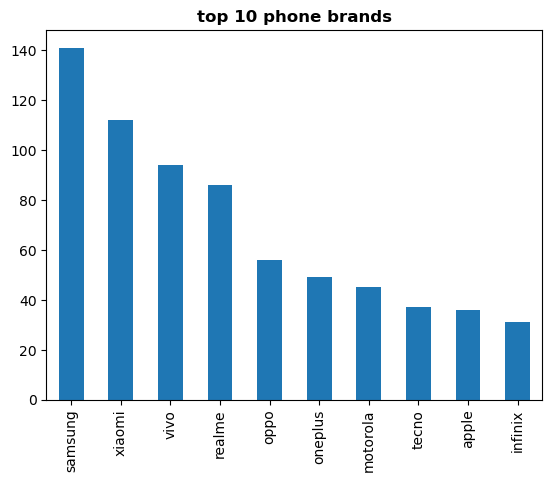

In [174]:
# top 10 phone brands
df['brand_name'].value_counts().head(10).plot(kind='bar')
plt.title('top 10 phone brands', fontweight='bold')

Text(0.5, 1.0, 'top 10 phone brands')

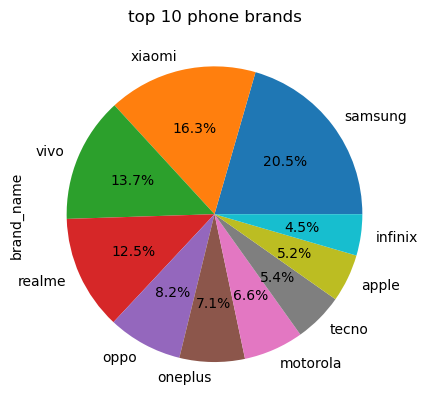

In [175]:
df['brand_name'].value_counts().head(10).plot(kind='pie',autopct='%0.1f%%')
plt.title('top 10 phone brands')

In [176]:
df['brand_name'].isnull().sum()

0

In [177]:
# price col

df['price'].describe()

count       897.000000
mean      35468.775920
std       36868.444341
min        3490.000000
25%       13990.000000
50%       22999.000000
75%       42990.000000
max      480000.000000
Name: price, dtype: float64

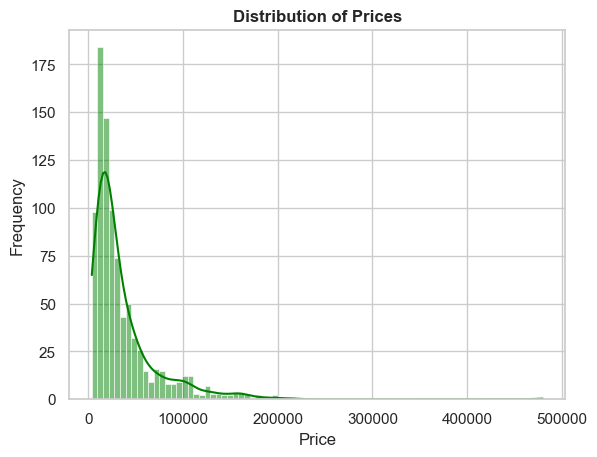

In [178]:
sns.set(style="whitegrid") 
sns.histplot(df['price'], kde=True, color='green')  # Use a single color for both histogram and KDE

plt.title('Distribution of Prices', fontweight='bold')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

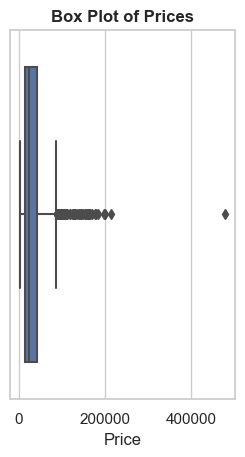

In [179]:
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.boxplot(data=df, x='price')
plt.title('Box Plot of Prices', fontweight='bold')
plt.xlabel('Price')

plt.show()  

In [180]:
df[df['price']>180000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_name,num_cores,processor_speed,os,ram_capacity_gb,internal_memory,battery_capacity_mAh,fast_charging,has_fastcharge,screen_size,resolution,refresh_rate,num_front_cameras,num_rear_cameras,primary_camera_rear_mp,primary_camera_front_mp,memory_card_availeble,extended_memory_gb
471,samsung,samsung galaxy z fold 5 (12gb ram + 1tb),184999,NaN,True,True,False,Snapdragon,Snapdragon 8 Gen 2,8.0,3.36,android,12.0,1000.0,4400.0,25.0,1,7.60,1812 x 2176,120,2,3,50.0,10.0,0,0
592,huawei,huawei mate 30 rs porsche design,214990,NaN,True,True,True,Kirin,Kirin 990,8.0,2.86,android,12.0,512.0,4500.0,33.0,1,6.53,1176 x 2400,60,2,4,40.0,32.0,1,256
593,xiaomi,xiaomi mi mix alpha,199990,NaN,True,False,False,Snapdragon,Snapdragon 855+,8.0,2.96,android,12.0,512.0,4050.0,40.0,1,7.92,2088 x 2250,60,1,3,108.0,16.0,0,0
594,xiaomi,xiaomi redmi k20 pro signature edition,480000,88.0,False,True,False,Snapdragon,Snapdragon 855,8.0,2.80,android,8.0,256.0,4000.0,27.0,1,6.39,1080 x 2340,60,1,3,48.0,20.0,0,0
721,samsung,samsung w22 5g,197999,NaN,True,True,False,Snapdragon,Snapdragon 888,8.0,2.84,android,16.0,512.0,4400.0,25.0,1,7.60,1768 x 2208,120,2,3,12.0,10.0,0,0


In [181]:
df.drop(index=594,inplace=True)

In [182]:
df['price'].isnull().sum()

0

***price column is highly skewed***

 ***The Xiaomi Redmi K20 Pro Signature Edition phone comes with diamonds and pure gold, which is not useful to predict the price as its price does not properly depend on its features alone, so we delete this information.***

**Visualize missing values using a heatmap**

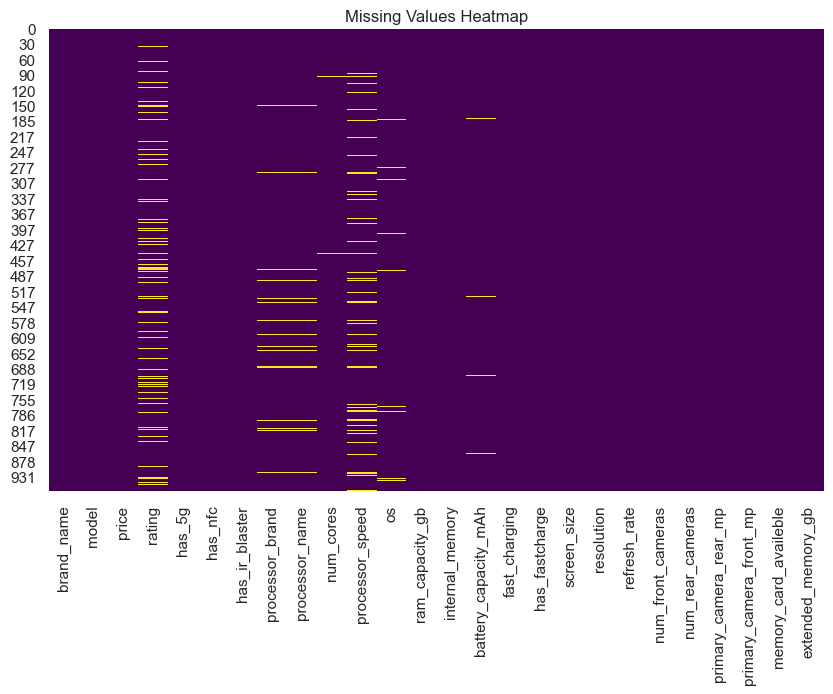

In [183]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


**Detect and visualize outliers**

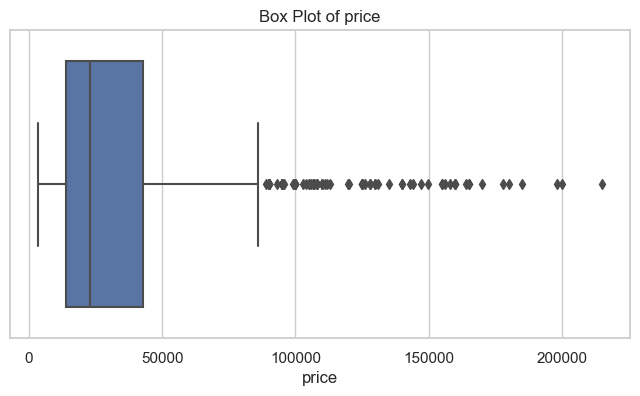

Outliers in price:
11      94990
12     130990
33     106500
61     127999
62     154999
        ...  
931    112990
937     89990
959    124999
982    109999
984    107990
Name: price, Length: 80, dtype: int64




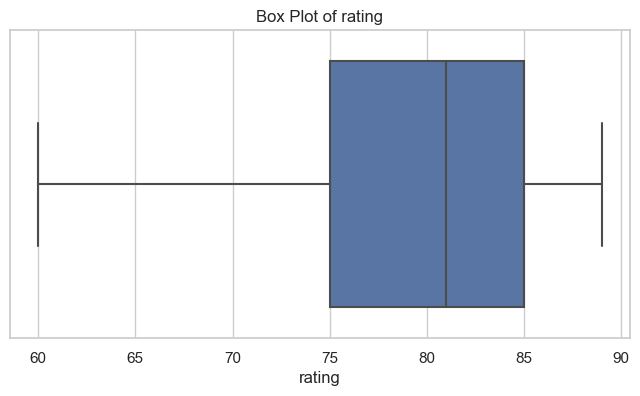

No outliers found in rating



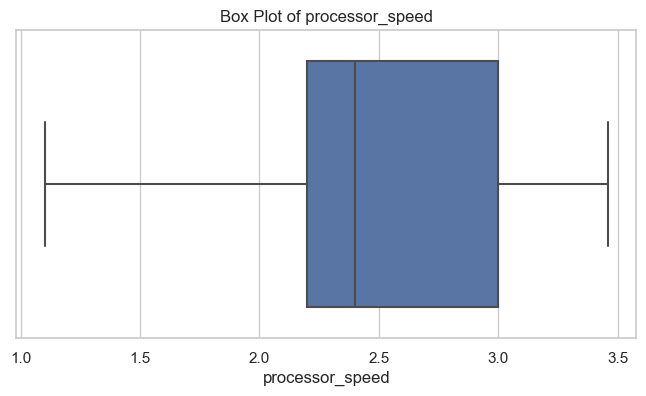

No outliers found in processor_speed



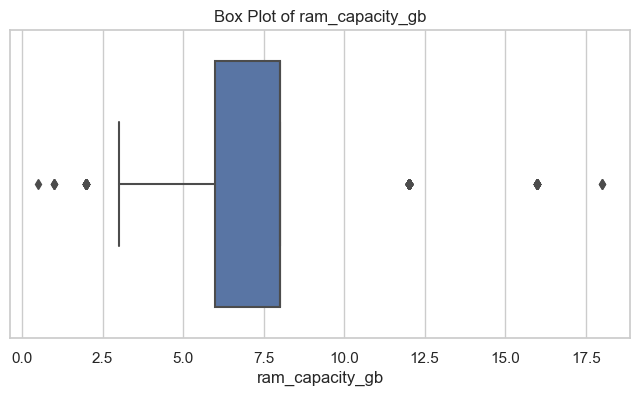

Outliers in ram_capacity_gb:
11     18.0
28     12.0
30     12.0
33     12.0
36     12.0
       ... 
961    12.0
966    12.0
974    16.0
984    16.0
986     2.0
Name: ram_capacity_gb, Length: 186, dtype: float64




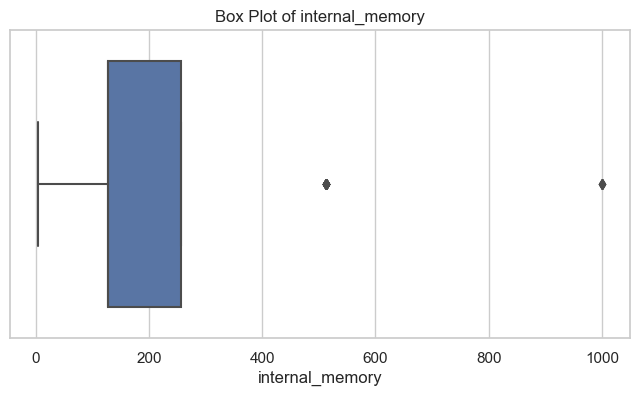

Outliers in internal_memory:
11      512.0
117    1000.0
217     512.0
264     512.0
268     512.0
277     512.0
278     512.0
328    1000.0
334     512.0
438     512.0
453     512.0
471    1000.0
516     512.0
532     512.0
592     512.0
593     512.0
702     512.0
705     512.0
717     512.0
721     512.0
808     512.0
825     512.0
840     512.0
877    1000.0
878     512.0
879     512.0
884     512.0
885     512.0
982     512.0
984     512.0
Name: internal_memory, dtype: float64




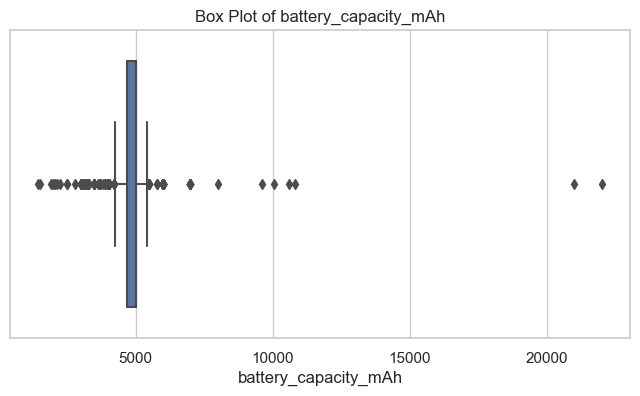

Outliers in battery_capacity_mAh:
4      6000.0
11     6000.0
19     6000.0
31     6000.0
34     6000.0
        ...  
958    4000.0
961    9600.0
974    6000.0
984    6000.0
986    3020.0
Name: battery_capacity_mAh, Length: 150, dtype: float64




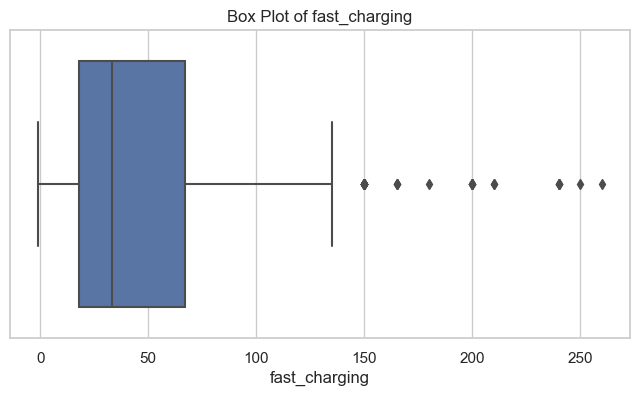

Outliers in fast_charging:
30     150.0
76     260.0
216    150.0
243    150.0
260    210.0
275    165.0
284    150.0
325    165.0
374    180.0
383    150.0
442    150.0
447    240.0
461    150.0
534    200.0
601    240.0
629    240.0
685    200.0
691    150.0
763    240.0
772    150.0
773    165.0
781    150.0
782    150.0
792    150.0
793    200.0
797    150.0
805    150.0
824    200.0
888    150.0
889    150.0
903    150.0
916    250.0
944    200.0
963    210.0
Name: fast_charging, dtype: float64




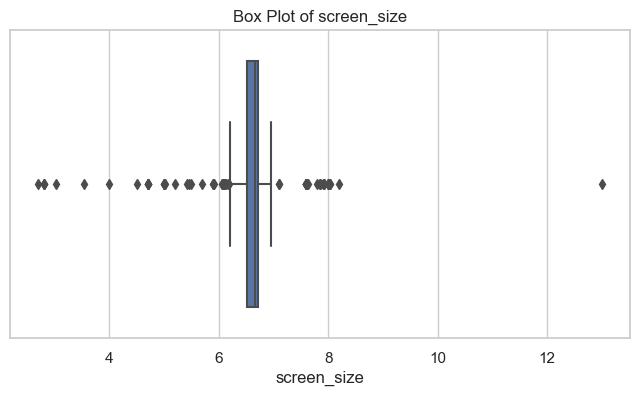

Outliers in screen_size:
12     6.06
43     6.10
52     6.10
62     7.60
93     6.10
       ... 
891    5.90
892    5.50
931    8.00
959    7.90
986    5.00
Name: screen_size, Length: 78, dtype: float64




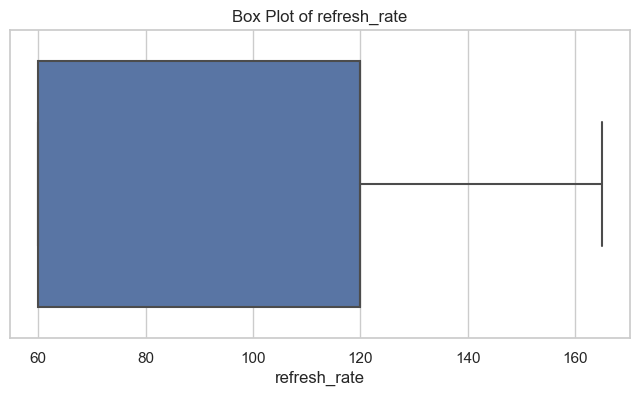

No outliers found in refresh_rate



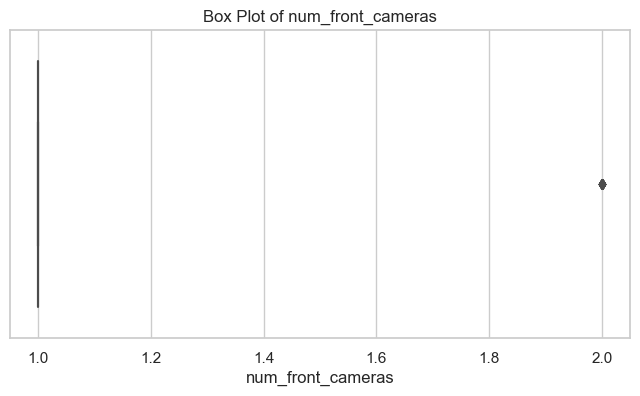

Outliers in num_front_cameras:
62     2
179    2
239    2
395    2
438    2
450    2
453    2
471    2
544    2
549    2
555    2
592    2
605    2
721    2
737    2
738    2
775    2
777    2
778    2
781    2
873    2
885    2
886    2
890    2
931    2
Name: num_front_cameras, dtype: int64




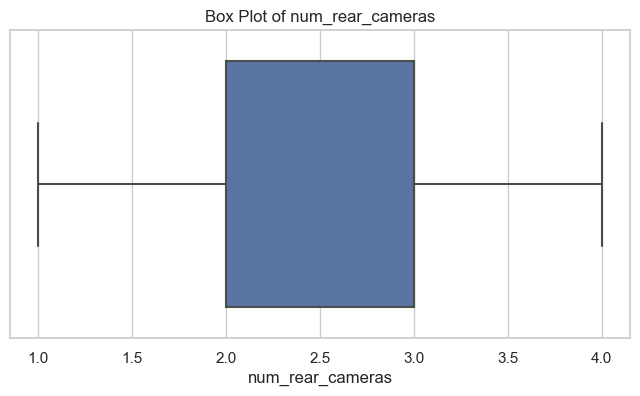

No outliers found in num_rear_cameras



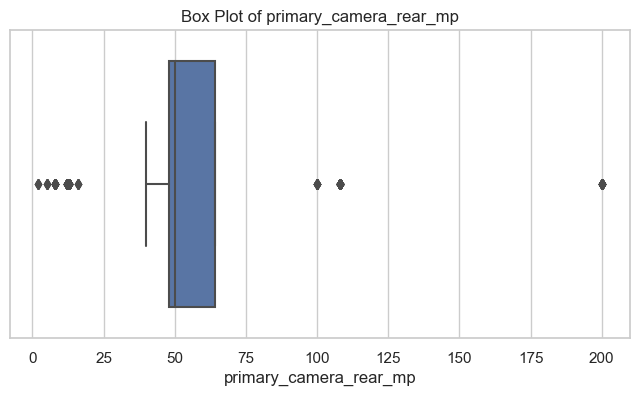

Outliers in primary_camera_rear_mp:
3      108.0
7      108.0
10     100.0
13      12.0
16     200.0
       ...  
968     13.0
970     13.0
982     12.0
986      2.0
987     12.2
Name: primary_camera_rear_mp, Length: 307, dtype: float64




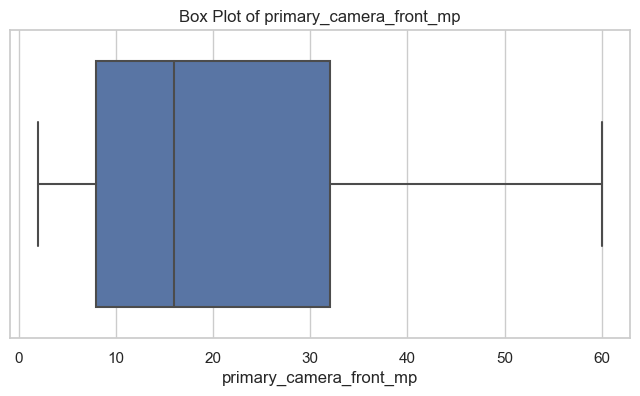

No outliers found in primary_camera_front_mp



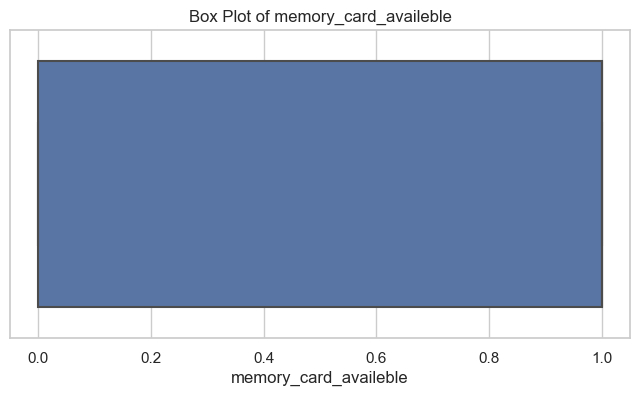

No outliers found in memory_card_availeble



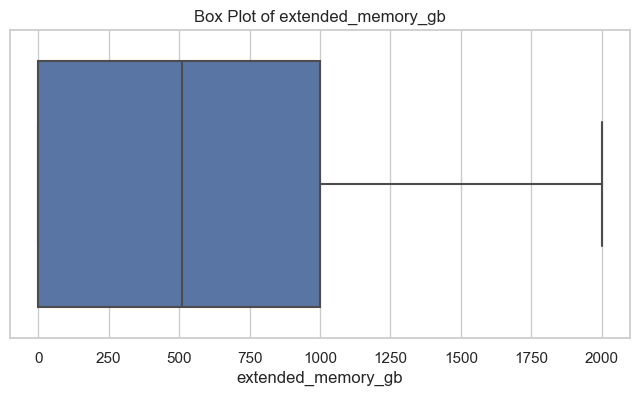

No outliers found in extended_memory_gb



In [184]:
# List of numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['num_cores','has_fastcharge'])

# Define a function for outlier detection and visualization
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    return outliers

# Detect and visualize outliers for each numeric column
for col in numeric_cols:
    outliers = detect_outliers(df[col])
    
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()
    
    if not outliers.empty:
        print(f'Outliers in {col}:')
        print(outliers)
        print('\n')
    else:
        print(f'No outliers found in {col}\n')


**Distribution of numeric columns**

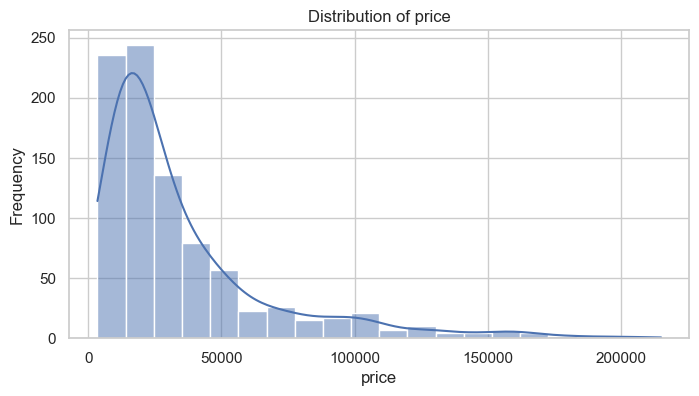

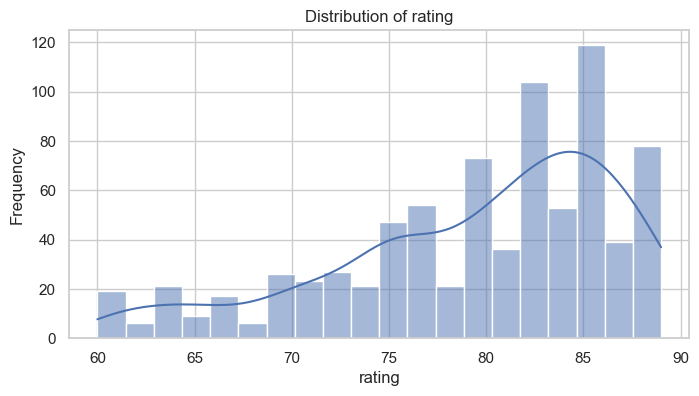

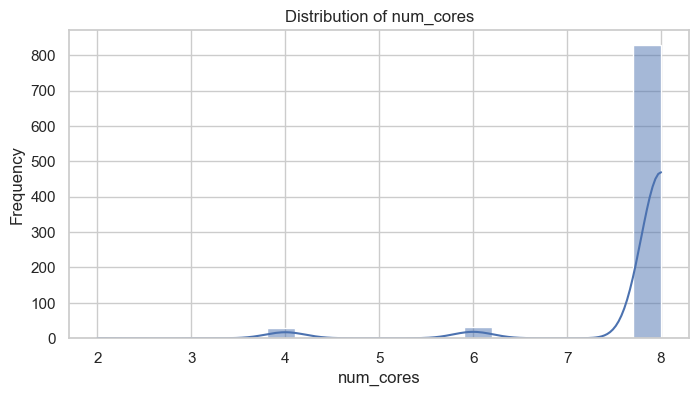

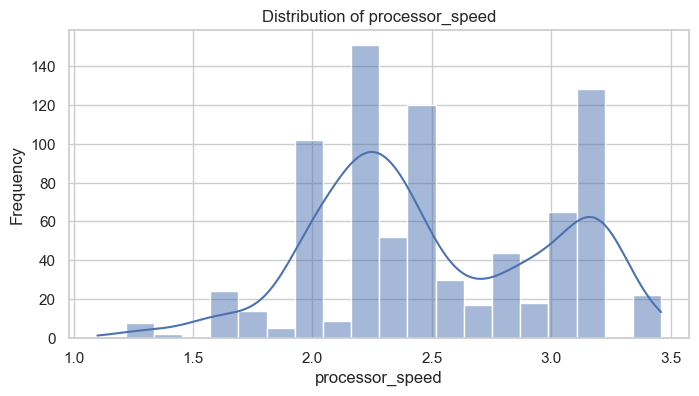

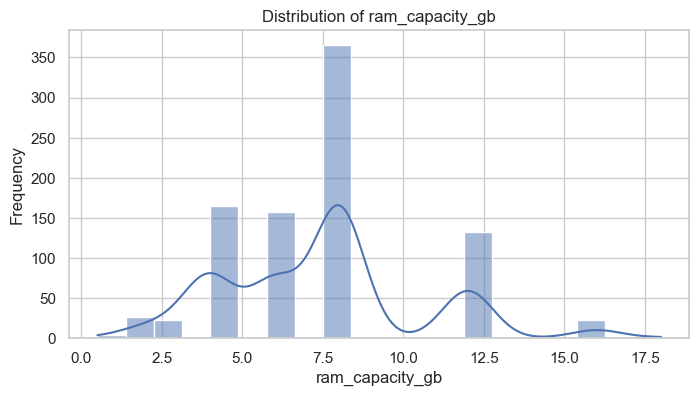

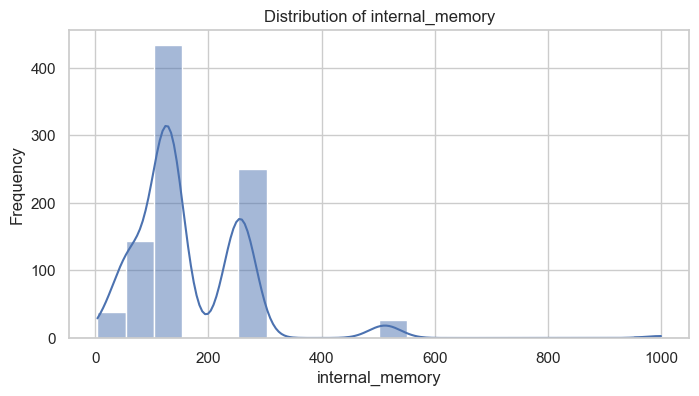

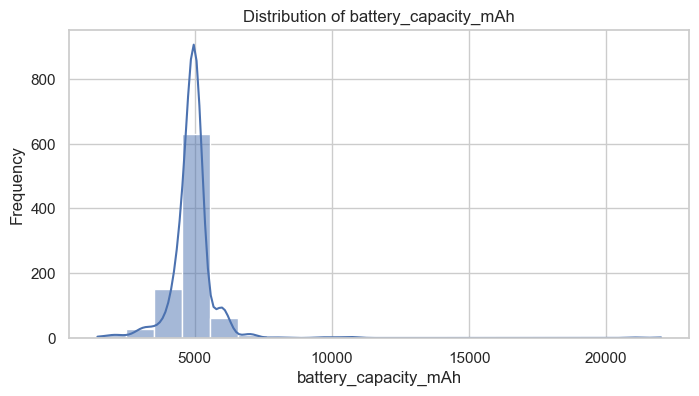

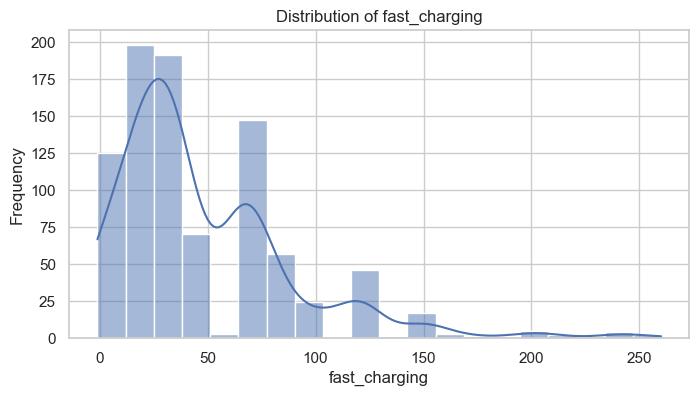

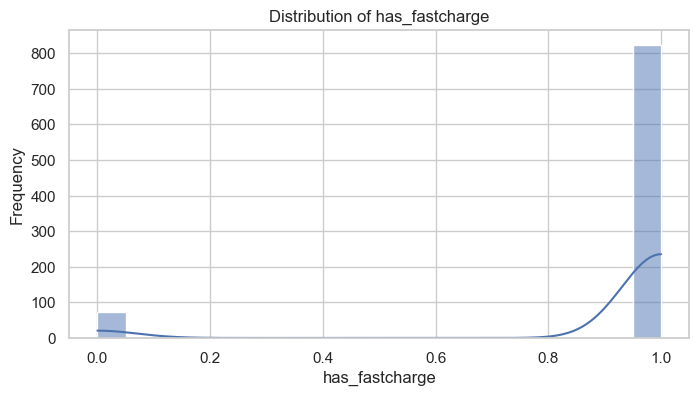

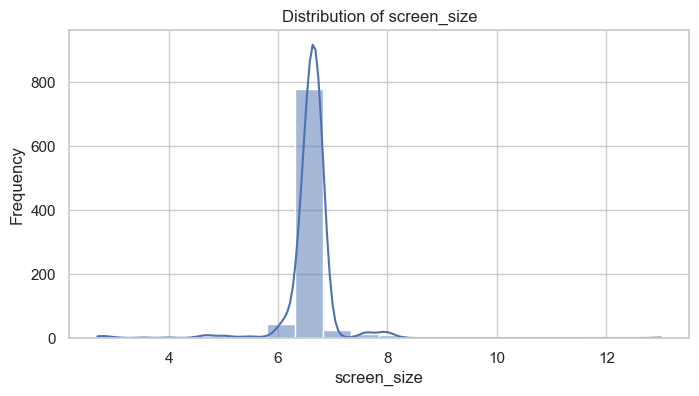

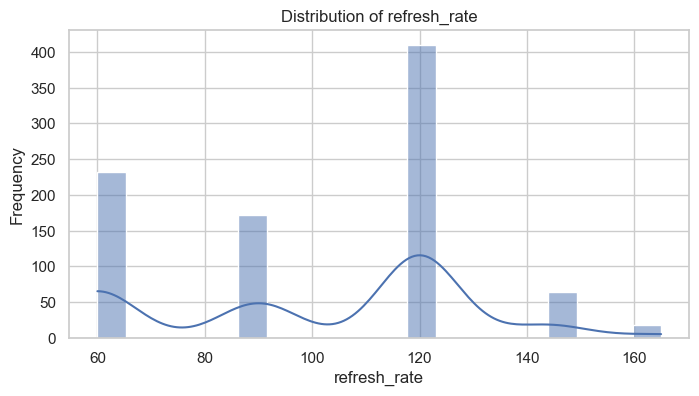

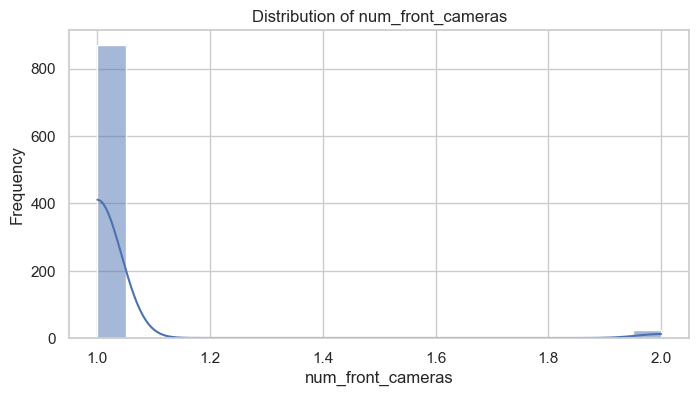

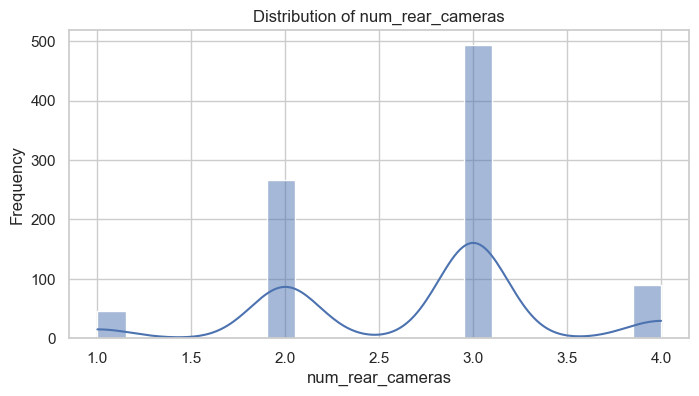

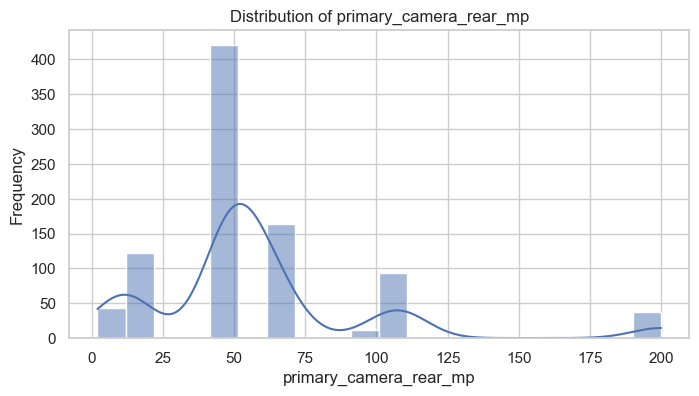

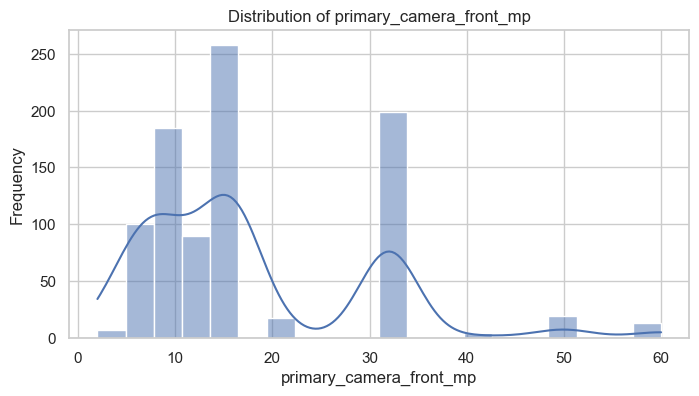

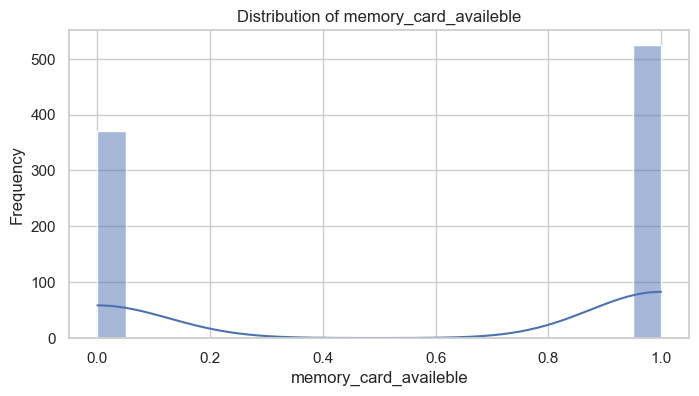

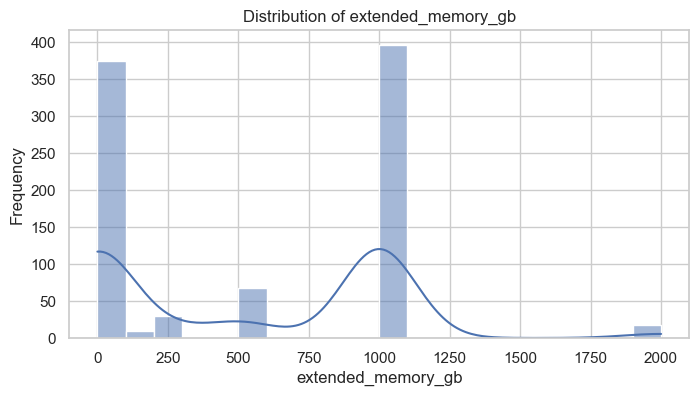

In [185]:
# Distribution of numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


**Distribution of categorical columns**

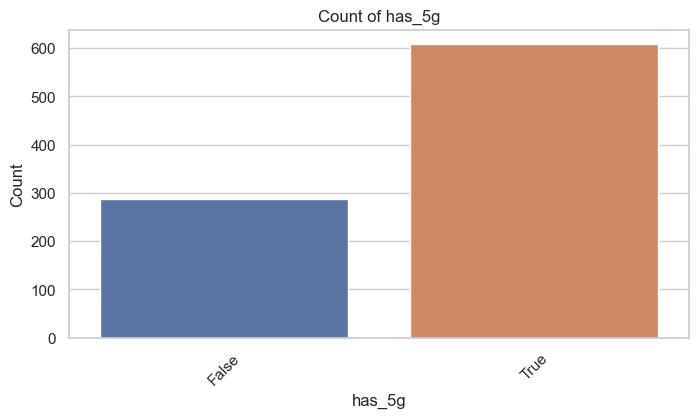

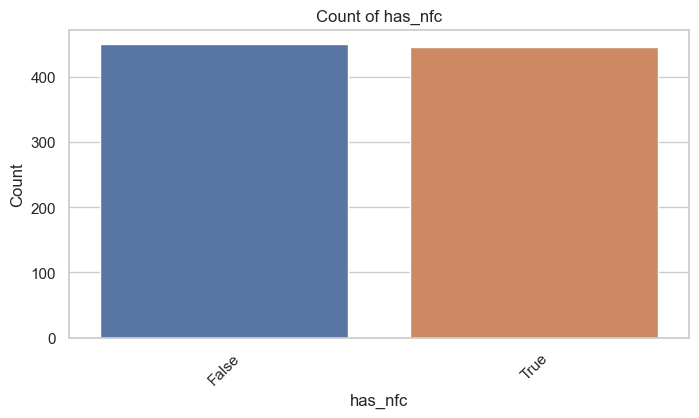

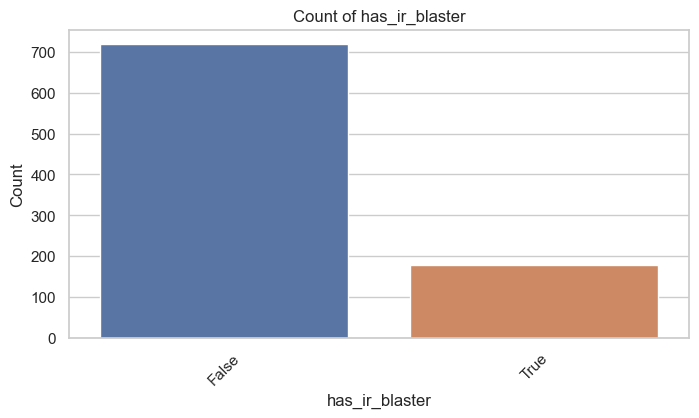

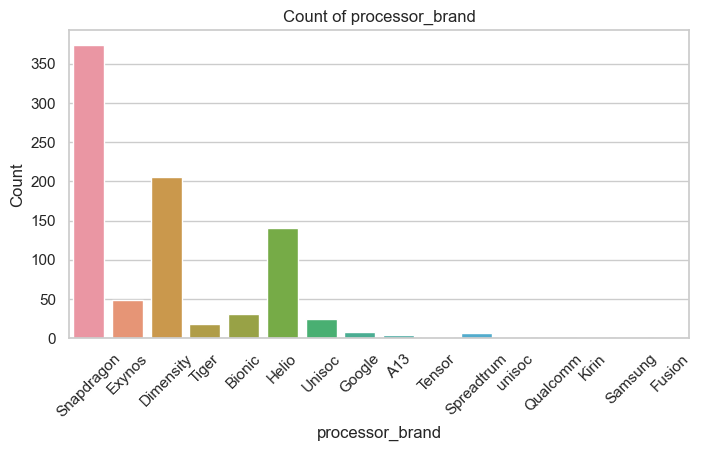

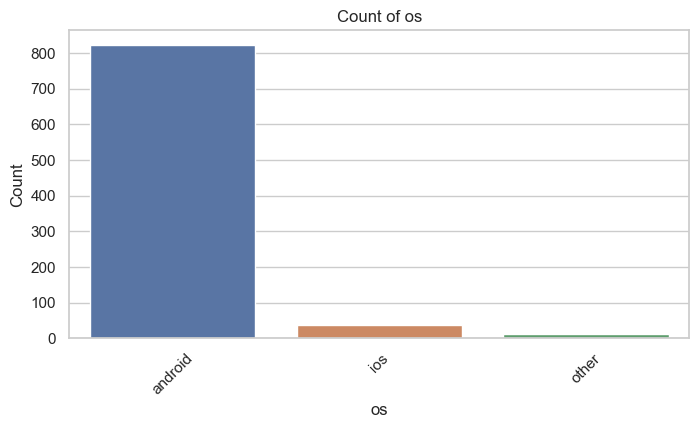

In [186]:
# Distribution of categorical columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.drop(['model','brand_name','processor_name','resolution'])
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


**Correlations between numerical features**

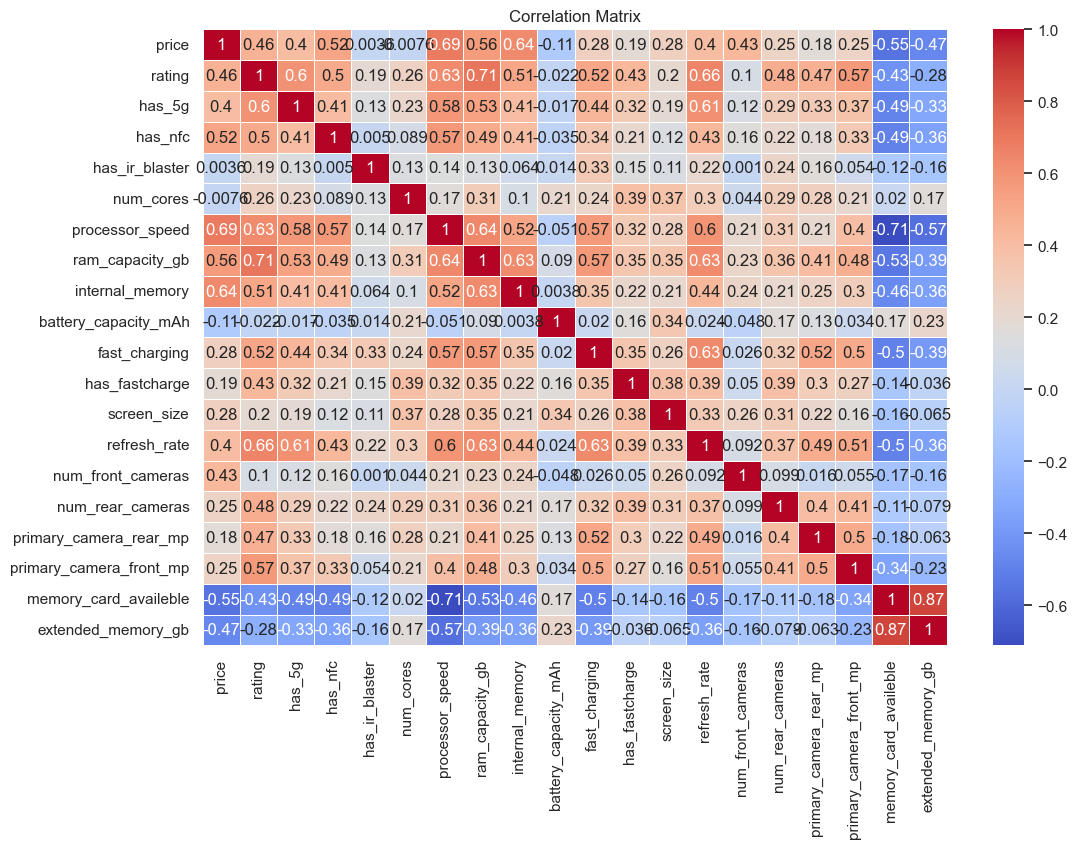

In [187]:
# Explore correlations between numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Pairplot for a detailed look at relationships between numerical features**

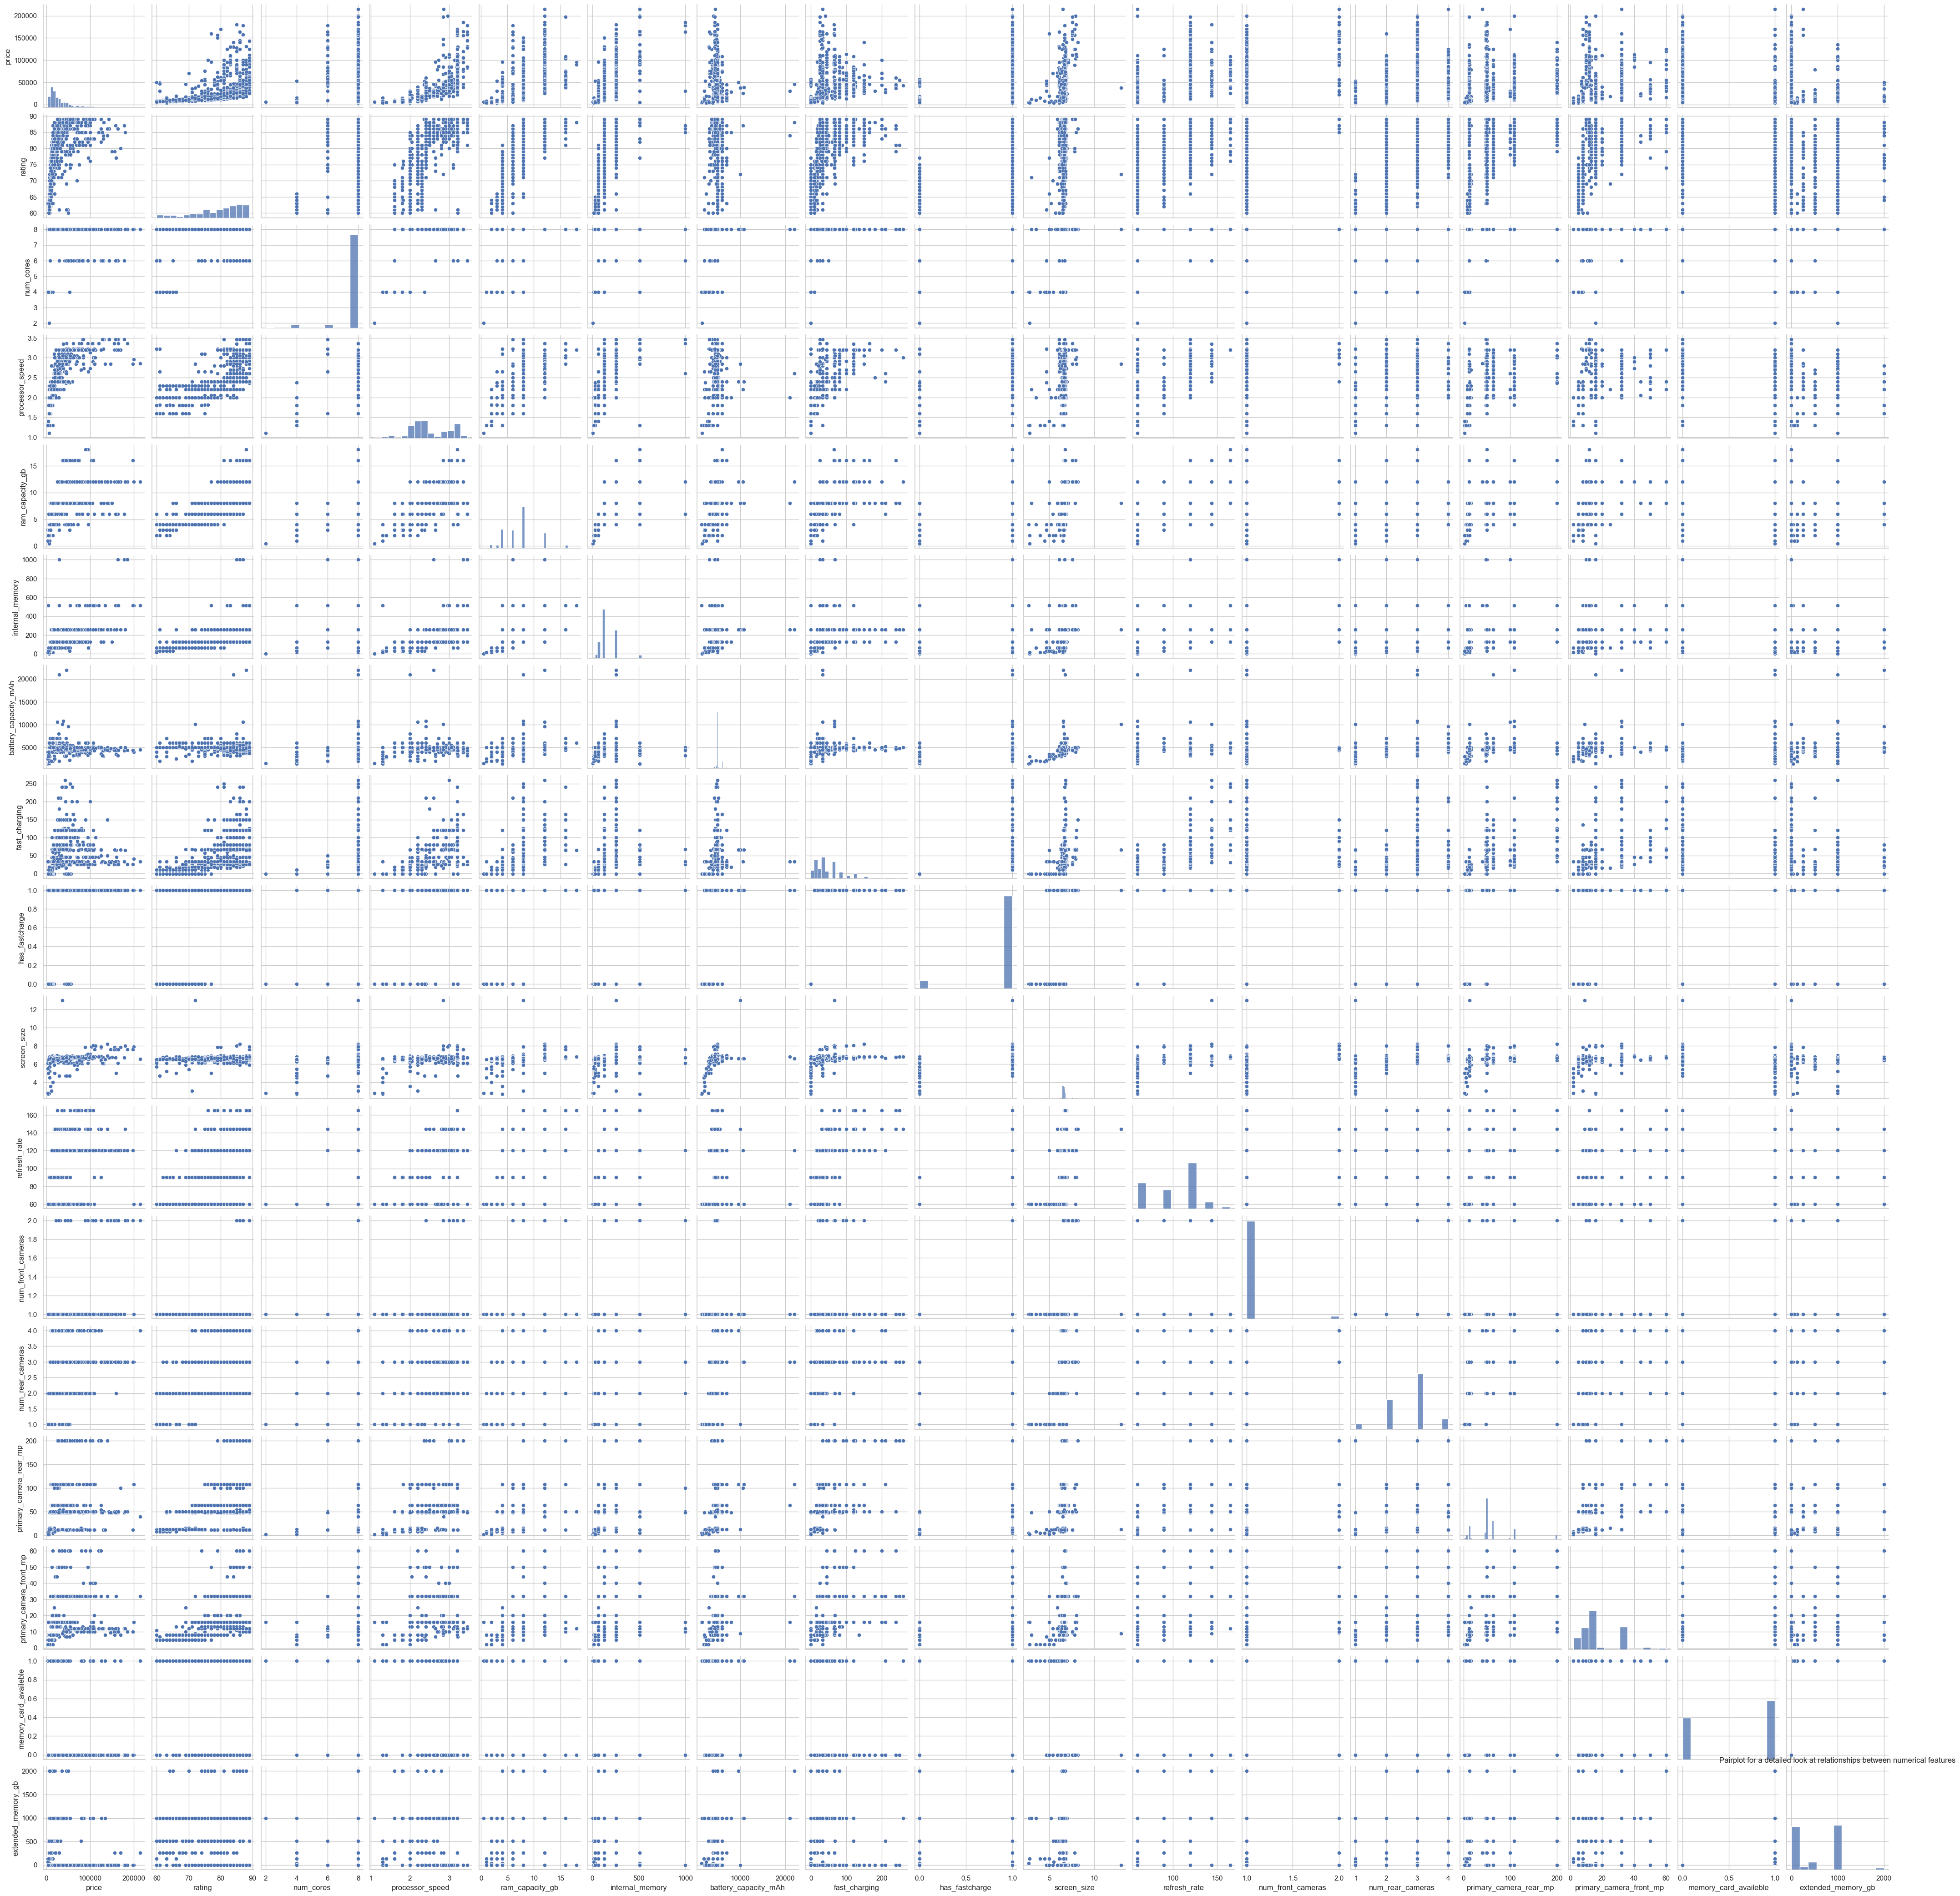

In [188]:
# Pairplot for a detailed look at relationships between numerical features
sns.pairplot(df[numeric_cols])
plt.title('Pairplot for a detailed look at relationships between numerical features')
plt.show()

# Feature Engeneering

In [406]:
df.isnull().sum()

brand_name                  0
model                       0
price                       0
rating                     97
has_5g                      0
has_nfc                     0
has_ir_blaster              0
processor_brand            25
processor_name             25
num_cores                   4
processor_speed            84
os                         25
ram_capacity_gb             0
internal_memory             0
battery_capacity_mAh        6
fast_charging               0
has_fastcharge              0
screen_size                 0
resolution                  0
refresh_rate                0
num_front_cameras           0
num_rear_cameras            0
primary_camera_rear_mp      0
primary_camera_front_mp     0
memory_card_availeble       0
extended_memory_gb          0
dtype: int64

## Dealing with missinig values in numerical columns 

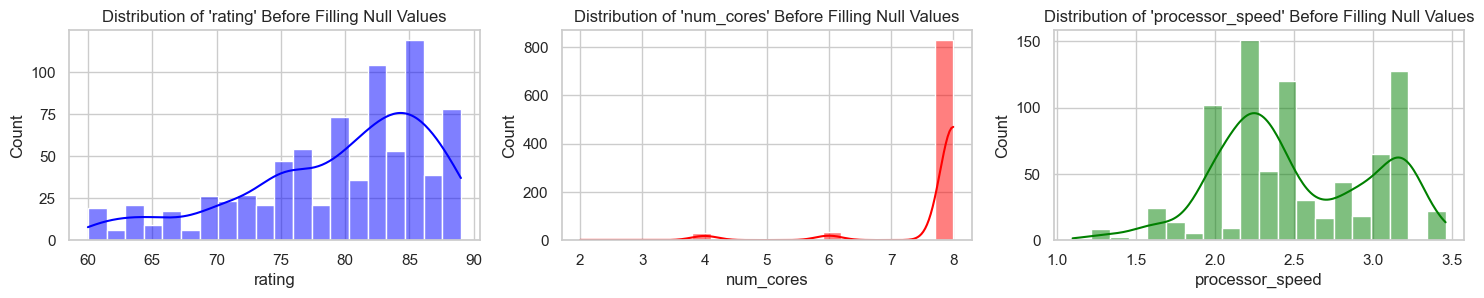

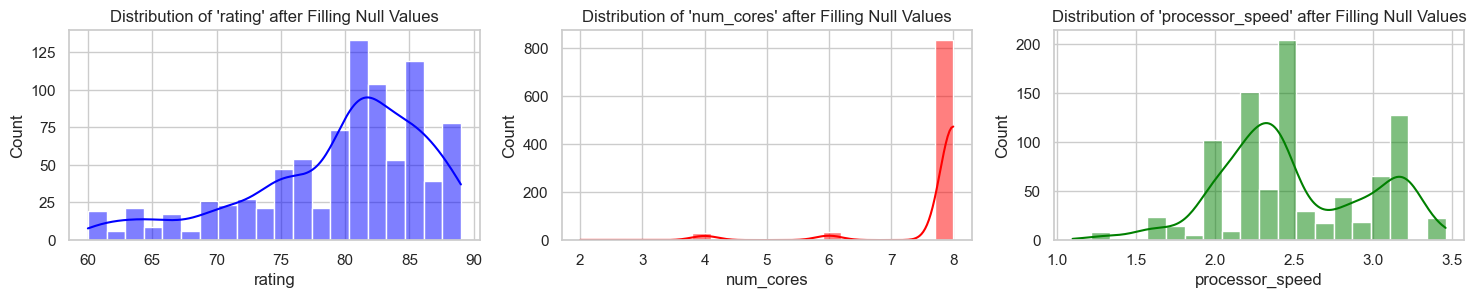

In [407]:
plt.figure(figsize=(18,6))
plt.subplot(2, 3, 1)
sns.histplot(df['rating'], bins=20, color='blue', kde=True)
plt.title("Distribution of 'rating' Before Filling Null Values")

plt.subplot(2, 3, 2)
sns.histplot(df['num_cores'], bins=20, color='red', kde=True)
plt.title("Distribution of 'num_cores' Before Filling Null Values")

plt.subplot(2, 3 ,3)
sns.histplot(df['processor_speed'], bins=20, color='green', kde=True)
plt.title("Distribution of 'processor_speed' Before Filling Null Values")

median_rating = df['rating'].median()
median_num_cores=df['num_cores'].median()
median_processor_speed=df['processor_speed'].median()
df['rating'].fillna(median_rating, inplace=True)
df['num_cores'].fillna(median_num_cores, inplace=True)
df['processor_speed'].fillna(median_processor_speed, inplace=True)

plt.figure(figsize=(18,6))
plt.subplot(2, 3, 1)
sns.histplot(df['rating'], bins=20, color='blue', kde=True)
plt.title("Distribution of 'rating' after Filling Null Values")

plt.subplot(2, 3, 2)
sns.histplot(df['num_cores'], bins=20, color='red', kde=True)
plt.title("Distribution of 'num_cores' after Filling Null Values")

plt.subplot(2, 3 ,3)
sns.histplot(df['processor_speed'], bins=20, color='green', kde=True)
plt.title("Distribution of 'processor_speed' after Filling Null Values")
plt.show()



## Dealing with missinig values in categorical columns 

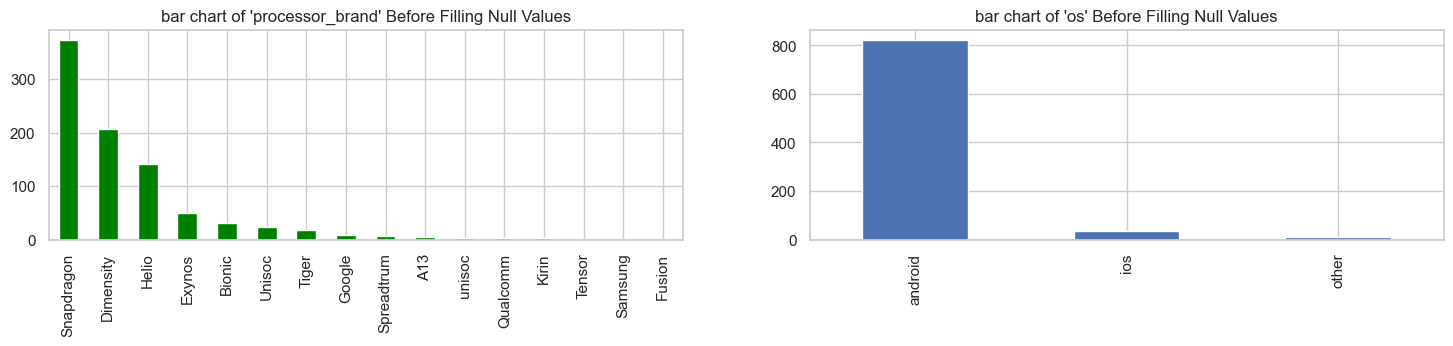

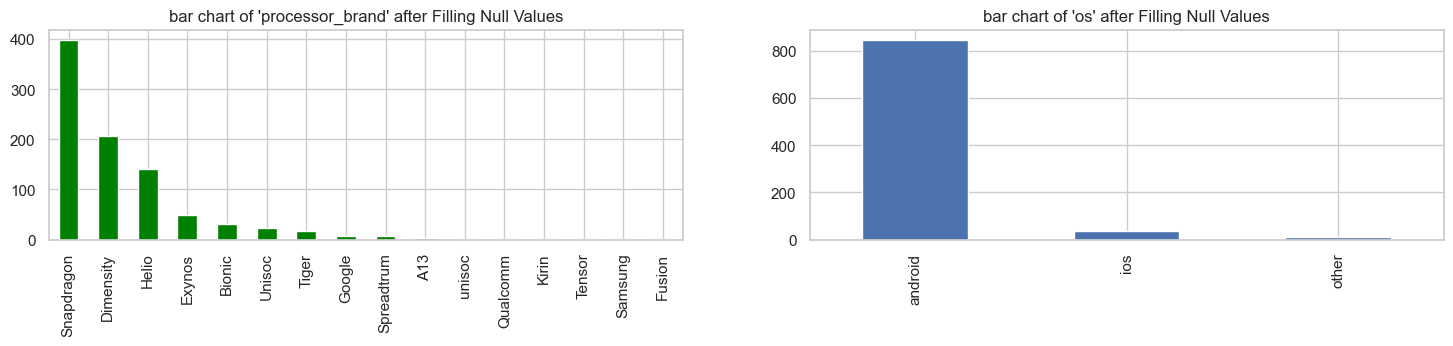

In [408]:
plt.figure(figsize=(18,6))
plt.subplot(2, 2, 1)
df['processor_brand'].value_counts().plot(kind='bar',color='green')
plt.title("bar chart of 'processor_brand' Before Filling Null Values")

plt.subplot(2, 2, 2)
df['os'].value_counts().plot(kind='bar')
plt.title("bar chart of 'os' Before Filling Null Values")

mode_processor_brand = df['processor_brand'].mode()[0]
mode_os=df['os'].mode()[0]
df['processor_brand'].fillna(mode_processor_brand, inplace=True)
df['os'].fillna(mode_os,inplace=True)

plt.figure(figsize=(18,6))
plt.subplot(2, 2, 1)
df['processor_brand'].value_counts().plot(kind='bar',color='green')
plt.title("bar chart of 'processor_brand' after Filling Null Values")


plt.subplot(2, 2, 2)
df['os'].value_counts().plot(kind='bar')
plt.title("bar chart of 'os' after Filling Null Values")
plt.show()

***We can see that the distribution of the data is quite same after filling the missing values***

In [409]:
df['battery_capacity_mAh'].isnull().sum()

6

In [410]:
df['battery_capacity_mAh'].fillna(df['battery_capacity_mAh'].median(),inplace=True)

In [411]:
pd.set_option('display.max_row',None)
df['resolution'].value_counts()

1080 x 2400                         295
720 x 1600                          101
1080 x 2408                          63
1080 x 2412                          53
1080 x 2460                          43
720 x 1612                           33
1080 x 2340                          31
1440 x 3200                          31
1240 x 2772                          19
1080 x 2388                          14
1440 x 3216                          11
1260 x 2800                          11
1600 x 720                           10
1170 x 2532                          10
720 x 1560                            9
1812 x 2176                           8
1080 x 2640                           8
1080 x 2520                           7
720 x 1650                            6
1284 x 2778                           6
1080 x 2448                           6
1116 x 2480                           6
1290 x 2796                           5
1080 x 2376                           5
2408 x 1080                           5


In [412]:
df['resolution']=df['resolution'].str.strip().replace('Full HD+ Display with Punch Hole', '1080x1920', regex=False)

In [413]:
def categorize_resolution(resolution):
    width, height = resolution.split('x')
    width = int(width.strip())
    height = int(height.strip())

    if width <= 720 and height <= 1280:
        
        return "HD"
    elif width <= 1080 and height <= 1920:
        return "FHD"
    elif width <= 1440 and height <= 2560:
        return "QHD"
    elif width <= 4096 and height <= 7680:
        return "UHD"
    else:
        return "4K+"

In [414]:
df['resolution']=df['resolution'].apply(categorize_resolution)

In [415]:
#create total no. of camera feature
df['total_cameras']=df['num_front_cameras']+df['num_rear_cameras']
df=df.drop(columns=['num_front_cameras','num_rear_cameras'])

In [416]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_name,num_cores,processor_speed,os,ram_capacity_gb,internal_memory,battery_capacity_mAh,fast_charging,has_fastcharge,screen_size,resolution,refresh_rate,primary_camera_rear_mp,primary_camera_front_mp,memory_card_availeble,extended_memory_gb,total_cameras
0,xiaomi,xiaomi redmi 12 5g,11999,75.0,True,False,True,Snapdragon,Snapdragon 4 Gen2,8.0,2.2,android,4.0,128.0,5000.0,18.0,1,6.79,QHD,90,50.0,8.0,1,1000,3
1,xiaomi,xiaomi redmi 12 5g (6 gb ram + 128 gb),13499,77.0,True,False,True,Snapdragon,Snapdragon 4 Gen2,8.0,2.2,android,6.0,128.0,5000.0,18.0,1,6.79,QHD,90,50.0,8.0,1,1000,3
2,xiaomi,xiaomi redmi 12 5g (8gb ram + 256gb),15499,80.0,True,False,True,Snapdragon,Snapdragon 4 Gen2,8.0,2.2,android,8.0,256.0,5000.0,18.0,1,6.79,QHD,90,50.0,8.0,1,1000,3
3,oneplus,oneplus nord ce 3 lite 5g,19999,85.0,True,False,False,Snapdragon,Snapdragon 695 5G,8.0,2.2,android,8.0,128.0,5000.0,67.0,1,6.72,QHD,120,108.0,16.0,1,1000,4
4,samsung,samsung galaxy f34 5g,18999,83.0,True,True,False,Exynos,Exynos 1280,8.0,2.4,android,6.0,128.0,6000.0,25.0,1,6.50,QHD,120,50.0,13.0,1,1000,4


In [205]:
df=pd.get_dummies(df,columns=['brand_name','processor_brand','os','resolution'])

In [206]:
def bool_extracter(bool):
    if bool==True:
        return 1
    else:
        return 0

In [207]:
df['has_5g']=df['has_5g'].apply(bool_extracter)
df['has_nfc']=df['has_nfc'].apply(bool_extracter)
df['has_ir_blaster']=df['has_ir_blaster'].apply(bool_extracter)

In [208]:
df_new=df.drop(columns=['model','processor_name'])

In [201]:
df_new.head()

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,os,ram_capacity_gb,internal_memory,battery_capacity_mAh,fast_charging,has_fastcharge,screen_size,resolution,refresh_rate,primary_camera_rear_mp,primary_camera_front_mp,memory_card_availeble,extended_memory_gb,total_cameras
0,xiaomi,11999,75.0,True,False,True,Snapdragon,8.0,2.2,android,4.0,128.0,5000.0,18.0,1,6.79,QHD,90,50.0,8.0,1,1000,3
1,xiaomi,13499,77.0,True,False,True,Snapdragon,8.0,2.2,android,6.0,128.0,5000.0,18.0,1,6.79,QHD,90,50.0,8.0,1,1000,3
2,xiaomi,15499,80.0,True,False,True,Snapdragon,8.0,2.2,android,8.0,256.0,5000.0,18.0,1,6.79,QHD,90,50.0,8.0,1,1000,3
3,oneplus,19999,85.0,True,False,False,Snapdragon,8.0,2.2,android,8.0,128.0,5000.0,67.0,1,6.72,QHD,120,108.0,16.0,1,1000,4
4,samsung,18999,83.0,True,True,False,Exynos,8.0,2.4,android,6.0,128.0,6000.0,25.0,1,6.50,QHD,120,50.0,13.0,1,1000,4


# Applying Machine Learning

In [209]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


**Split the data into training and test sets and features Standardization**

In [210]:
# Load your dataset and prepare X and y
y = df_new['price']
X = df_new.drop(columns=['price'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Applying 'Random Forest Regressor' with hyperparmeter tuning**

In [213]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Define a grid of hyperparameters to search
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth'[None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='r2')

# Fit the GridSearchCV to the training data
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best RandomForestRegressor model from the search
best_rf_model = grid_search_rf.best_estimator_

# Predict using the best model
rf_train_preds = best_rf_model.predict(X_train_scaled)
rf_test_preds = best_rf_model.predict(X_test_scaled)

# Calculate R-squared
rf_train_r2 = r2_score(y_train, rf_train_preds)
rf_test_r2 = r2_score(y_test, rf_test_preds)

# Print the best hyperparameters and R-squared
print("Best Random Forest Model Hyperparameters:", grid_search_rf.best_params_)
print("Random Forest Train R-squared:", rf_train_r2)
print("Random Forest Test R-squared:", rf_test_r2)


Best Random Forest Model Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Train R-squared: 0.9749430544876109
Random Forest Test R-squared: 0.9112268459809751


**Applying 'Decision Tree Regressor' with hyperparmeter tuning**

In [214]:
# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Define a grid of hyperparameters to search
param_grid_dt = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='r2')

# Fit the GridSearchCV to the training data
grid_search_dt.fit(X_train_scaled, y_train)

# Get the best DecisionTreeRegressor model from the search
best_dt_model = grid_search_dt.best_estimator_

# Predict using the best model
dt_train_preds = best_dt_model.predict(X_train_scaled)
dt_test_preds = best_dt_model.predict(X_test_scaled)

# Calculate R-squared
dt_train_r2 = r2_score(y_train, dt_train_preds)
dt_test_r2 = r2_score(y_test, dt_test_preds)

# Print the best hyperparameters and R-squared
print("Best Decision Tree Model Hyperparameters:", grid_search_dt.best_params_)
print("Decision Tree Train R-squared:", dt_train_r2)
print("Decision Tree Test R-squared:", dt_test_r2)


Best Decision Tree Model Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Decision Tree Train R-squared: 0.904820794210078
Decision Tree Test R-squared: 0.8503937919830167


**Applying 'Support Vector Regression' with hyperparmeter tuning**

In [215]:
# Create an SVR model
svr_model = SVR()

# Define a grid of hyperparameters to search
param_grid_svr = {
    'C': [1000,10000],
    'kernel': ['poly','sigmoid','rbf'],
    'degree': [3,4],  # Only for poly kernel
    'coef0': [0.1,1.0],  # Only for poly and sigmoid kernels
    'epsilon': [1000,10000],
}

# Create a GridSearchCV object
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=5, scoring='r2')

# Fit the GridSearchCV to the training data
grid_search_svr.fit(X_train_scaled, y_train)

# Get the best SVR model from the search
best_svr_model = grid_search_svr.best_estimator_

# Predict using the best model
svr_train_preds = best_svr_model.predict(X_train_scaled)
svr_test_preds = best_svr_model.predict(X_test_scaled)

# Calculate R-squared
svr_train_r2 = r2_score(y_train, svr_train_preds)
svr_test_r2 = r2_score(y_test, svr_test_preds)

# Print the best hyperparameters and R-squared
print("Best SVR Model Hyperparameters:", grid_search_svr.best_params_)
print("SVR Train R-squared:", svr_train_r2)
print("SVR Test R-squared:", svr_test_r2)


Best SVR Model Hyperparameters: {'C': 10000, 'coef0': 1.0, 'degree': 4, 'epsilon': 1000, 'kernel': 'poly'}
SVR Train R-squared: 0.9367330758479326
SVR Test R-squared: 0.8947995055134104


**Applying 'KNN Regressor' with hyperparmeter tuning**

In [216]:
# Create a KNN Regressor model
knn_model = KNeighborsRegressor()

# Define a grid of hyperparameters to search
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9,11,13,17,19,21,24,29,31,39,41,51,100],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3, 4,6,8,10,15]
}

# Create a GridSearchCV object
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring='r2')

# Fit the GridSearchCV to the training data
grid_search_knn.fit(X_train_scaled, y_train)

# Get the best KNN model from the search
best_knn_model = grid_search_knn.best_estimator_

# Predict using the best model
knn_train_preds = best_knn_model.predict(X_train_scaled)
knn_test_preds = best_knn_model.predict(X_test_scaled)

# Calculate R-squared
knn_train_r2 = r2_score(y_train, knn_train_preds)
knn_test_r2 = r2_score(y_test, knn_test_preds)

# Print the best hyperparameters and R-squared
print("Best KNN Model Hyperparameters:", grid_search_knn.best_params_)
print("KNN Train R-squared:", knn_train_r2)
print("KNN Test R-squared:", knn_test_r2)


Best KNN Model Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
KNN Train R-squared: 0.9999673810894748
KNN Test R-squared: 0.8629136262454518


# Model Evaluation and Selection

To choose the best model among the options (Random Forest, Decision Tree, SVR, and KNN), we need to consider various factors, including the R-squared scores, potential overfitting or underfitting, and the specific requirements of the problem. Here's an analysis of each model:

1. **Random Forest**:
   - Train R-squared: 0.975
   - Test R-squared: 0.911

   The Random Forest model has very high R-squared scores on both the training and test data, indicating a strong ability to fit the data. However, there is a slight performance drop from training to testing, which is expected but not excessive. This suggests that the model may have some level of overfitting, but it's not severe.

2. **Decision Tree**:
   - Train R-squared: 0.905
   - Test R-squared: 0.850

   The Decision Tree model has a lower R-squared score compared to Random Forest. It also shows a drop in performance from training to testing, indicating some overfitting. 
3. **SVR (Support Vector Regression)**:
   - Train R-squared: 0.937
   - Test R-squared: 0.895

   SVR performs well with a high R-squared score on both training and test data. The drop in performance from training to testing is relatively small, suggesting that it may not be overfitting the data. The hyperparameters also seem reasonable for this model.

4. **KNN (K-Nearest Neighbors)**:
   - Train R-squared: 0.999
   - Test R-squared: 0.863

   KNN has an extremely high R-squared score on the training data, but it drops significantly on the test data, indicating severe overfitting. This model may not generalize well to new, unseen data.

Based on the these information, it appears that the **Support Vector Regression (SVR)** model is the most suitable choice for this problem. It has a good balance between high R-squared scores and minimal overfitting. The hyperparameters also seem reasonable. 

Hence we choose **Support Vector Regression (SVR).**